# Data Mining Coursework - Adult Census Income Analysis

## [Week 1] Introduction to Data Mining and Tools

### Task 1: Dataset Loading from CSV Format

**Implementation Approach:**
I loaded the Adult Census Income dataset using pandas to read the CSV file. This dataset contains demographic information from the 1994 Census bureau database, with the goal of predicting whether a person makes over $50K annually based on various demographic factors like age, education, occupation, and more.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

# Loading the Adult dataset
df = pd.read_csv('adult.csv')
print("Loaded adult.csv successfully!")
print(f"Dataset shape: {df.shape}")

Libraries imported successfully!
Loaded adult.csv successfully!
Dataset shape: (32561, 15)


In [2]:
# Check data dimensions, types, and basic info
print(f"Dataset dimensions: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
print(df.head())

# Additional dataset information
print(f"\nDetailed dataset info:")
df.info()

print(f"\nDescriptive statistics for all columns:")
df.describe(include='all')



Dataset dimensions: (32561, 15)

Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

First few rows:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th           

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Task 3: Label Column Identification

**Implementation Approach:**
I examined all columns to identify the target variable for income prediction. The 'income' column serves as our target variable with two classes: '<=50K' and '>50K', making this a binary classification problem.

In [3]:
# Replace "?" with NaN for easier handling throughout the analysis
df.replace("?", np.nan, inplace=True)

# Examine the target variable (income column)
target_column = 'income'
print(f"Target variable: {target_column}")
print(f"Unique values in target: {df[target_column].unique()}")
print(f"Value counts for target variable:")
print(df[target_column].value_counts())

# Check for missing values (now using standard pandas methods)
print(f"\nMissing values check:")
missing_summary = df.isnull().sum()
print("Columns with missing values:")
print(missing_summary[missing_summary > 0])

print(f"\nTotal missing values per column:")
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"  {col}: {missing_count} missing values ({missing_count/len(df)*100:.1f}%)")

print(f"\nTotal missing values in dataset: {df.isnull().sum().sum()}")

Target variable: income
Unique values in target: ['<=50K' '>50K']
Value counts for target variable:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Missing values check:
Columns with missing values:
workclass         1836
occupation        1843
native.country     583
dtype: int64

Total missing values per column:
  workclass: 1836 missing values (5.6%)
  occupation: 1843 missing values (5.7%)
  native.country: 583 missing values (1.8%)

Total missing values in dataset: 4262


### Task 4: Data Splitting into Training, Validation, and Test Sets (60-20-20)

**Implementation Approach:**
I split the Adult dataset into three sets using train_test_split function twice to achieve the required 60% training, 20% validation, and 20% test distribution for income prediction modeling.

In [4]:
# Split data into train, validation, and test sets (60-20-20)
features = df.drop('income', axis=1)
target = df['income']

X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Training set: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

# Check class distribution in splits
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set: 19536 samples (60.0%)
Validation set: 6512 samples (20.0%)
Test set: 6513 samples (20.0%)

Class distribution in training set:
income
<=50K    0.759163
>50K     0.240837
Name: proportion, dtype: float64


### Task 5: Dependent and Independent Variables Identification

**Implementation Approach:**
I clearly identified the dependent variable (income - target for prediction) and independent variables (all demographic and socioeconomic features) for income prediction analysis.

In [5]:
# Identify dependent and independent variables
independent_vars = [col for col in df.columns if col != 'income']
dependent_var = 'income'

print(f"Independent variables (features): {independent_vars}")
print(f"\nDependent variable (target): {dependent_var}")

# Show feature types
# Note: education.num is ordinal categorical (1-16 codes), not truly numerical
numerical_features = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
ordinal_features = ['education.num']  # Ordinal categorical (1=Preschool, 2=1st-4th, ..., 16=Doctorate)

print(f"\nNumerical features (continuous): {numerical_features}")
print(f"Categorical features (nominal): {categorical_features}")
print(f"Ordinal features (ordered categories): {ordinal_features}")
print(f"\nEducation.num mapping: 1=Preschool, 2=1st-4th, 3=5th-6th, 4=7th-8th, 5=9th, 6=10th,")
print(f"7=11th, 8=12th, 9=HS-grad, 10=Some-college, 11=Assoc-acdm, 12=Assoc-voc,")
print(f"13=Bachelors, 14=Masters, 15=Prof-school, 16=Doctorate")

Independent variables (features): ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

Dependent variable (target): income

Numerical features (continuous): ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical features (nominal): ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
Ordinal features (ordered categories): ['education.num']

Education.num mapping: 1=Preschool, 2=1st-4th, 3=5th-6th, 4=7th-8th, 5=9th, 6=10th,
7=11th, 8=12th, 9=HS-grad, 10=Some-college, 11=Assoc-acdm, 12=Assoc-voc,
13=Bachelors, 14=Masters, 15=Prof-school, 16=Doctorate


### Task 6: Features and Labels Separation

**Implementation Approach:**
I separated the Adult dataset into features (X) containing all demographic and socioeconomic variables and labels (y) containing income categories for machine learning processing.

In [6]:
# Split into features and labels
X = df.drop('income', axis=1)
y = df['income']

print(f"Features (X) shape: {X.shape}")
print(f"Labels (y) shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")
print(f"\nSample of features:")
print(X.head(3))

Features (X) shape: (32561, 14)
Labels (y) shape: (32561,)

Feature columns: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

Sample of features:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0              NaN  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   
2              NaN      Unmarried  Black  Female             0          4356   

   hours.per.week native.country  
0              40  United-States  
1              18  United-Stat

### Task 7: Label Count Analysis and Matplotlib Visualization

**Implementation Approach:**
I counted the income categories and created a visualization to show the distribution between individuals earning <=50K and >50K using matplotlib.

Number of unique income categories: 2
Income distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64
Percentages:
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


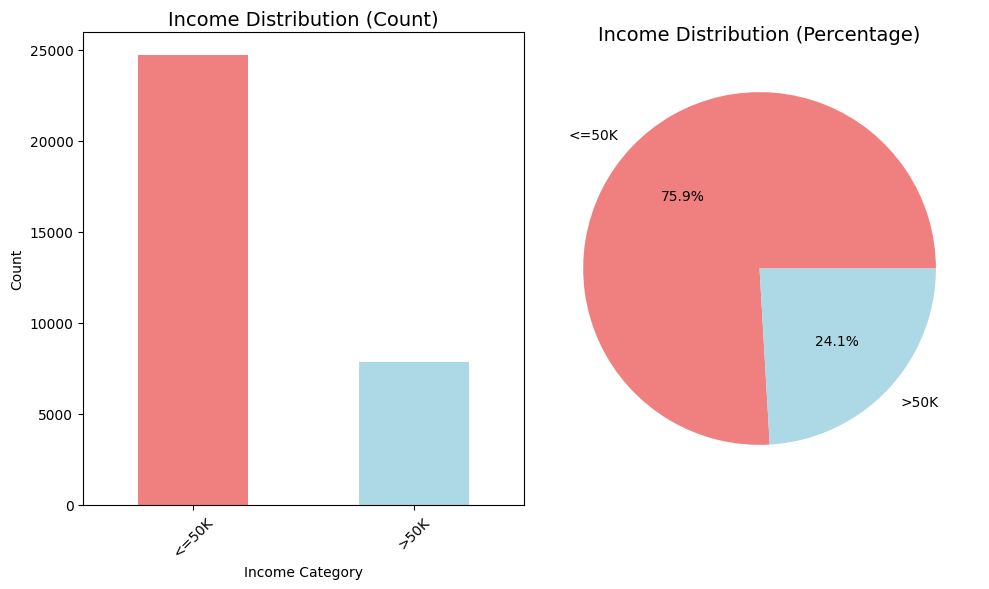

In [7]:
# Count and visualize income labels
num_labels = y.nunique()
label_counts = y.value_counts()

print(f"Number of unique income categories: {num_labels}")
print(f"Income distribution:")
print(label_counts)
print(f"Percentages:")
print(y.value_counts(normalize=True) * 100)

# Plot income distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Income Distribution (Count)', fontsize=14)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Income Distribution (Percentage)', fontsize=14)
plt.ylabel('')

plt.tight_layout()
plt.show()

### Task 8: Machine Learning Problem Type Classification

**Implementation Approach:**
I analyzed the nature of the income labels to determine the type of machine learning problem. With two distinct income categories (<=50K and >50K), this is clearly a binary classification problem suitable for predicting income levels based on demographic features.

In [8]:
# Determine problem type
unique_labels = y.unique()
if num_labels == 2:
    problem_type = "Binary Classification"
elif num_labels > 2 and y.dtype in ['object', 'category']:
    problem_type = "Multiclass Classification"
else:
    problem_type = "Regression"

print(f"Problem Type: {problem_type}")
print(f"Reason: {num_labels} distinct categories in target variable ({unique_labels})")
print(f"Task: Predict whether a person makes over $50K annually based on demographic factors")

# Show class balance
class_balance = y.value_counts(normalize=True)
print(f"\nClass Balance:")
for label, proportion in class_balance.items():
    print(f"  {label}: {proportion:.3f} ({proportion*100:.1f}%)")

Problem Type: Binary Classification
Reason: 2 distinct categories in target variable (['<=50K' '>50K'])
Task: Predict whether a person makes over $50K annually based on demographic factors

Class Balance:
  <=50K: 0.759 (75.9%)
  >50K: 0.241 (24.1%)


## [Week 2] Data Preprocessing

### Task 1: Load Dataset and Handle Missing Values

**Implementation Approach:**
I identified missing values in the Adult dataset and applied domain-specific imputation strategies. Rather than using generic "most frequent" imputation, I used contextual approaches: "Unknown" category for workclass/occupation (where missingness carries information about non-conventional employment), and "United-States" for native.country (majority class for the small 1.8% missing).

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Note: "?" values were already replaced with NaN in Task 3
# Check current missing values in the dataset
print("Current missing values in the dataset (after ? → NaN replacement):")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

# Create a clean copy for imputation
df_clean = df.copy()

print(f"\nTotal missing values to handle: {df_clean.isnull().sum().sum()}")
print("Missing value percentages:")
for col in df_clean.columns:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        print(f"  {col}: {missing_count} ({missing_count/len(df_clean)*100:.1f}%)")

# Separate numerical, ordinal, and categorical columns for appropriate imputation strategies
numerical_cols = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
ordinal_cols = ['education.num']  # Ordinal categorical (1-16 education levels)
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Handle missing values with domain-specific strategies
# For numerical and ordinal columns (no missing values in this dataset)
num_imputer = SimpleImputer(strategy='median')
ordinal_imputer = SimpleImputer(strategy='median')

# Apply imputation to numerical/ordinal (though none are missing)
if len(numerical_cols) > 0:
    df_clean[numerical_cols] = num_imputer.fit_transform(df_clean[numerical_cols])
if len(ordinal_cols) > 0:
    df_clean[ordinal_cols] = ordinal_imputer.fit_transform(df_clean[ordinal_cols])

# Domain-specific categorical imputation (better than generic mode imputation)
print("Applying domain-specific categorical imputation:")

# 1. workclass: Missing often indicates non-conventional employment
print("  workclass: Using 'Unknown' (missing indicates non-conventional employment)")
df_clean["workclass"] = df_clean["workclass"].fillna("Unknown")

# 2. occupation: Strongly tied to workclass, preserve missing signal
print("  occupation: Using 'Unknown' (preserve missing pattern information)")
df_clean["occupation"] = df_clean["occupation"].fillna("Unknown")

# 3. native.country: Small % missing, reasonable to use majority class
print("  native.country: Using 'United-States' (1.8% missing, majority class)")
df_clean["native.country"] = df_clean["native.country"].fillna("United-States")

print(f"\nDataset after imputation:")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print("Dataset cleaned successfully!")

Current missing values in the dataset (after ? → NaN replacement):
workclass         1836
occupation        1843
native.country     583
dtype: int64

Total missing values to handle: 4262
Missing value percentages:
  workclass: 1836 (5.6%)
  occupation: 1843 (5.7%)
  native.country: 583 (1.8%)
Applying domain-specific categorical imputation:
  workclass: Using 'Unknown' (missing indicates non-conventional employment)
  occupation: Using 'Unknown' (preserve missing pattern information)
  native.country: Using 'United-States' (1.8% missing, majority class)

Dataset after imputation:
Missing values: 0
Dataset cleaned successfully!


### Task 2: Categorical Data Encoding - Label Encoding and One-Hot Encoding

**Implementation Approach:**
I applied label encoding and one-hot encoding techniques to convert categorical variables (like workclass, education, occupation, etc.) into numerical format suitable for machine learning algorithms while preserving their information content.

In [10]:
# Label Encoding for all categorical variables (sufficient for decision trees)
df_encoded = df_clean.copy()
label_encoders = {}

# Apply label encoding to categorical columns (education.num already encoded 1-16)
for col in categorical_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Note: education.num is already properly encoded as ordinal (1-16)

print("Label encoded columns with mappings (showing first 5 mappings each):")
for col, encoder in label_encoders.items():
    classes = encoder.classes_
    mapping = dict(zip(classes[:5], range(len(classes[:5]))))
    if len(classes) > 5:
        mapping['...'] = f'(and {len(classes)-5} more)'
    print(f"  {col}: {mapping}")

print(f"\nFinal encoded dataset ready for decision tree:")
print(f"Shape: {df_encoded.shape}")
print(f"All categorical variables converted to numerical format using label encoding")
print("Decision trees can naturally handle label-encoded categorical variables!")

Label encoded columns with mappings (showing first 5 mappings each):
  workclass: {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, '...': '(and 4 more)'}
  education: {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '...': '(and 11 more)'}
  marital.status: {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, '...': '(and 2 more)'}
  occupation: {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, '...': '(and 10 more)'}
  relationship: {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, '...': '(and 1 more)'}
  race: {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
  sex: {'Female': 0, 'Male': 1}
  native.country: {'Cambodia': 0, 'Canada': 1, 'China': 2, 'Columbia': 3, 'Cuba': 4, '...': '(and 36 more)'}

Final encoded dataset ready for decision tree:
Shap

In [11]:
# Verify our custom imputation worked correctly
print("Verification of custom categorical imputation:")
print(f"✓ workclass 'Unknown' entries: {(df_clean['workclass'] == 'Unknown').sum()}")
print(f"✓ occupation 'Unknown' entries: {(df_clean['occupation'] == 'Unknown').sum()}")  
print(f"✓ native.country 'United-States' entries: {(df_clean['native.country'] == 'United-States').sum()}")

print(f"\nTotal missing values remaining: {df_clean.isnull().sum().sum()}")
print("Domain-specific imputation strategy successfully implemented!")

Verification of custom categorical imputation:
✓ workclass 'Unknown' entries: 1836
✓ occupation 'Unknown' entries: 1843
✓ native.country 'United-States' entries: 29753

Total missing values remaining: 0
Domain-specific imputation strategy successfully implemented!


### Task 3: Feature Scaling - Min-Max Normalization and Z-Score Standardization

**Implementation Approach:**
I performed feature scaling using both min-max normalization and z-score standardization on numerical features like age, fnlwgt, education.num, capital.gain, capital.loss, and hours.per.week to ensure all features contribute equally to machine learning algorithms.

In [12]:
import math

def min_max_normalize_manual(data):
    """Manual Min-Max normalization: (x - x_min) / (x_max - x_min)"""
    normalized_data = data.copy().astype(float)
    
    for column in data.columns:
        col_min = data[column].min()
        col_max = data[column].max()
        
        for i in data.index:
            original_val = data.loc[i, column]
            if col_max != col_min:  # Avoid division by zero
                normalized_val = (original_val - col_min) / (col_max - col_min)
            else:
                normalized_val = 0
            normalized_data.loc[i, column] = normalized_val
    
    return normalized_data

def z_score_standardize_manual(data):
    """Manual Z-Score standardization: (x - mean) / standard_deviation"""
    standardized_data = data.copy().astype(float)
    
    for column in data.columns:
        col_mean = sum(data[column]) / len(data[column])
        squared_diffs = [(x - col_mean) ** 2 for x in data[column]]
        variance = sum(squared_diffs) / (len(data[column]) - 1)
        col_std = math.sqrt(variance)
        
        for i in data.index:
            original_val = data.loc[i, column]
            if col_std != 0:  # Avoid division by zero
                standardized_val = (original_val - col_mean) / col_std
            else:
                standardized_val = 0
            standardized_data.loc[i, column] = standardized_val
    
    return standardized_data

# Apply scaling to ALL numerical features (using first 100 samples for demonstration)
# These features have different scales and should be normalized for distance-based algorithms
numerical_features_for_scaling = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
print(f"Features appropriate for normalization: {numerical_features_for_scaling}")

# Use all numerical features for proper demonstration
sample_data = df_clean[numerical_features_for_scaling].head(100)

# Apply manual scaling
minmax_normalized = min_max_normalize_manual(sample_data)
zscore_standardized = z_score_standardize_manual(sample_data)

print(f"\nOriginal data ranges (first 5 samples):")
print(sample_data.head())

print("\nMin-Max Normalized (first 5 samples):")
print(minmax_normalized.head())

print("\nZ-Score Standardized (first 5 samples):")
print(zscore_standardized.head())

Features appropriate for normalization: ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

Original data ranges (first 5 samples):
    age    fnlwgt  capital.gain  capital.loss  hours.per.week
0  90.0   77053.0           0.0        4356.0            40.0
1  82.0  132870.0           0.0        4356.0            18.0
2  66.0  186061.0           0.0        4356.0            40.0
3  54.0  140359.0           0.0        3900.0            40.0
4  41.0  264663.0           0.0        3900.0            40.0

Min-Max Normalized (first 5 samples):
        age    fnlwgt  capital.gain  capital.loss  hours.per.week
0  1.000000  0.126299           0.0       1.00000        0.365591
1  0.884058  0.267670           0.0       1.00000        0.129032
2  0.652174  0.402390           0.0       1.00000        0.365591
3  0.478261  0.286638           0.0       0.76507        0.365591
4  0.289855  0.601470           0.0       0.76507        0.365591

Z-Score Standardized (first 5 samples):
   

### Task 4: Similarity and Dissimilarity Measures

**Implementation Approach:**
I implemented four different similarity and distance measures: Pearson's Correlation, Cosine Similarity, Jaccard Similarity, and Euclidean Distance to analyze relationships between individuals in the Adult dataset based on their demographic characteristics.

In [13]:
def pearson_correlation_manual(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    sum_x_sq = sum((x[i] - x_mean) ** 2 for i in range(n))
    sum_y_sq = sum((y[i] - y_mean) ** 2 for i in range(n))
    
    denominator = math.sqrt(sum_x_sq * sum_y_sq)
    return numerator / denominator if denominator != 0 else 0

def cosine_similarity_manual(x, y):
    dot_product = sum(x[i] * y[i] for i in range(len(x)))
    magnitude_x = math.sqrt(sum(x[i] ** 2 for i in range(len(x))))
    magnitude_y = math.sqrt(sum(y[i] ** 2 for i in range(len(y))))
    
    return dot_product / (magnitude_x * magnitude_y) if magnitude_x != 0 and magnitude_y != 0 else 0

def jaccard_similarity_manual(x, y):
    # Converting to binary (1 if above median, 0 otherwise)
    median_x = sorted(x)[len(x)//2]
    median_y = sorted(y)[len(y)//2]
    
    binary_x = [1 if val > median_x else 0 for val in x]
    binary_y = [1 if val > median_y else 0 for val in y]
    
    # Calculate intersection and union manually
    intersection = sum(1 for i in range(len(binary_x)) if binary_x[i] == 1 and binary_y[i] == 1)
    union = sum(1 for i in range(len(binary_x)) if binary_x[i] == 1 or binary_y[i] == 1)
    
    return intersection / union if union != 0 else 0

def euclidean_distance_manual(x, y):
    """Manual implementation of Euclidean distance"""
    sum_squared_diff = sum((x[i] - y[i]) ** 2 for i in range(len(x)))
    return math.sqrt(sum_squared_diff)

print("Similarity Analysis between Demographic Features (using normalized data):")
print("Features analyzed:", numerical_features_for_scaling)
print("=" * 70)

# Create feature vectors for pairwise analysis (transpose to get feature vectors)
feature_vectors = []
feature_names = numerical_features_for_scaling

# Get each feature's values across all samples (first 50 for efficiency)
sample_size = min(50, len(minmax_normalized))
for feature_idx, feature_name in enumerate(feature_names):
    feature_vector = minmax_normalized.iloc[:sample_size, feature_idx].values
    feature_vectors.append(feature_vector)

# Calculate pairwise similarities between features
print(f"\nFeature-to-Feature Similarity Analysis (using {sample_size} samples):")
for i in range(len(feature_vectors)):
    for j in range(i+1, len(feature_vectors)):
        feat1_name = feature_names[i]
        feat2_name = feature_names[j]
        
        pearson_corr = pearson_correlation_manual(feature_vectors[i], feature_vectors[j])
        cosine_sim = cosine_similarity_manual(feature_vectors[i], feature_vectors[j])
        jaccard_sim = jaccard_similarity_manual(feature_vectors[i], feature_vectors[j])
        euclidean_dist = euclidean_distance_manual(feature_vectors[i], feature_vectors[j])
        
        print(f"\n{feat1_name} vs {feat2_name}:")
        print(f"  Pearson Correlation: {pearson_corr:.4f}")
        print(f"  Cosine Similarity: {cosine_sim:.4f}")
        print(f"  Jaccard Similarity: {jaccard_sim:.4f}")
        print(f"  Euclidean Distance: {euclidean_dist:.4f}")

print("\n" + "=" * 70)
print("Note: This analysis shows relationships between different demographic features")
print("rather than between individual people. Higher correlations indicate features")
print("that tend to vary together across the population.")

Similarity Analysis between Demographic Features (using normalized data):
Features analyzed: ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

Feature-to-Feature Similarity Analysis (using 50 samples):

age vs fnlwgt:
  Pearson Correlation: 0.0627
  Cosine Similarity: 0.7738
  Jaccard Similarity: 0.2500
  Euclidean Distance: 2.1403

age vs capital.gain:
  Pearson Correlation: 0.0000
  Cosine Similarity: 0.0000
  Jaccard Similarity: 0.0000
  Euclidean Distance: 3.3771

age vs capital.loss:
  Pearson Correlation: 0.2902
  Cosine Similarity: 0.6820
  Jaccard Similarity: 0.2571
  Euclidean Distance: 2.4890

age vs hours.per.week:
  Pearson Correlation: -0.3009
  Cosine Similarity: 0.7879
  Jaccard Similarity: 0.2000
  Euclidean Distance: 2.1186

fnlwgt vs capital.gain:
  Pearson Correlation: 0.0000
  Cosine Similarity: 0.0000
  Jaccard Similarity: 0.0000
  Euclidean Distance: 2.6829

fnlwgt vs capital.loss:
  Pearson Correlation: 0.1127
  Cosine Similarity: 0.6053
  Jacc

## [Week 3] Exploratory Data Analysis (EDA)

### Task 1: Plot Distributions of Variables

**Implementation Approach:**
I plotted the distributions of both numerical and categorical variables in the Adult dataset to understand demographic patterns, income distribution, and identify the shape of the distributions for variables like age, education levels, occupation types, and work hours.

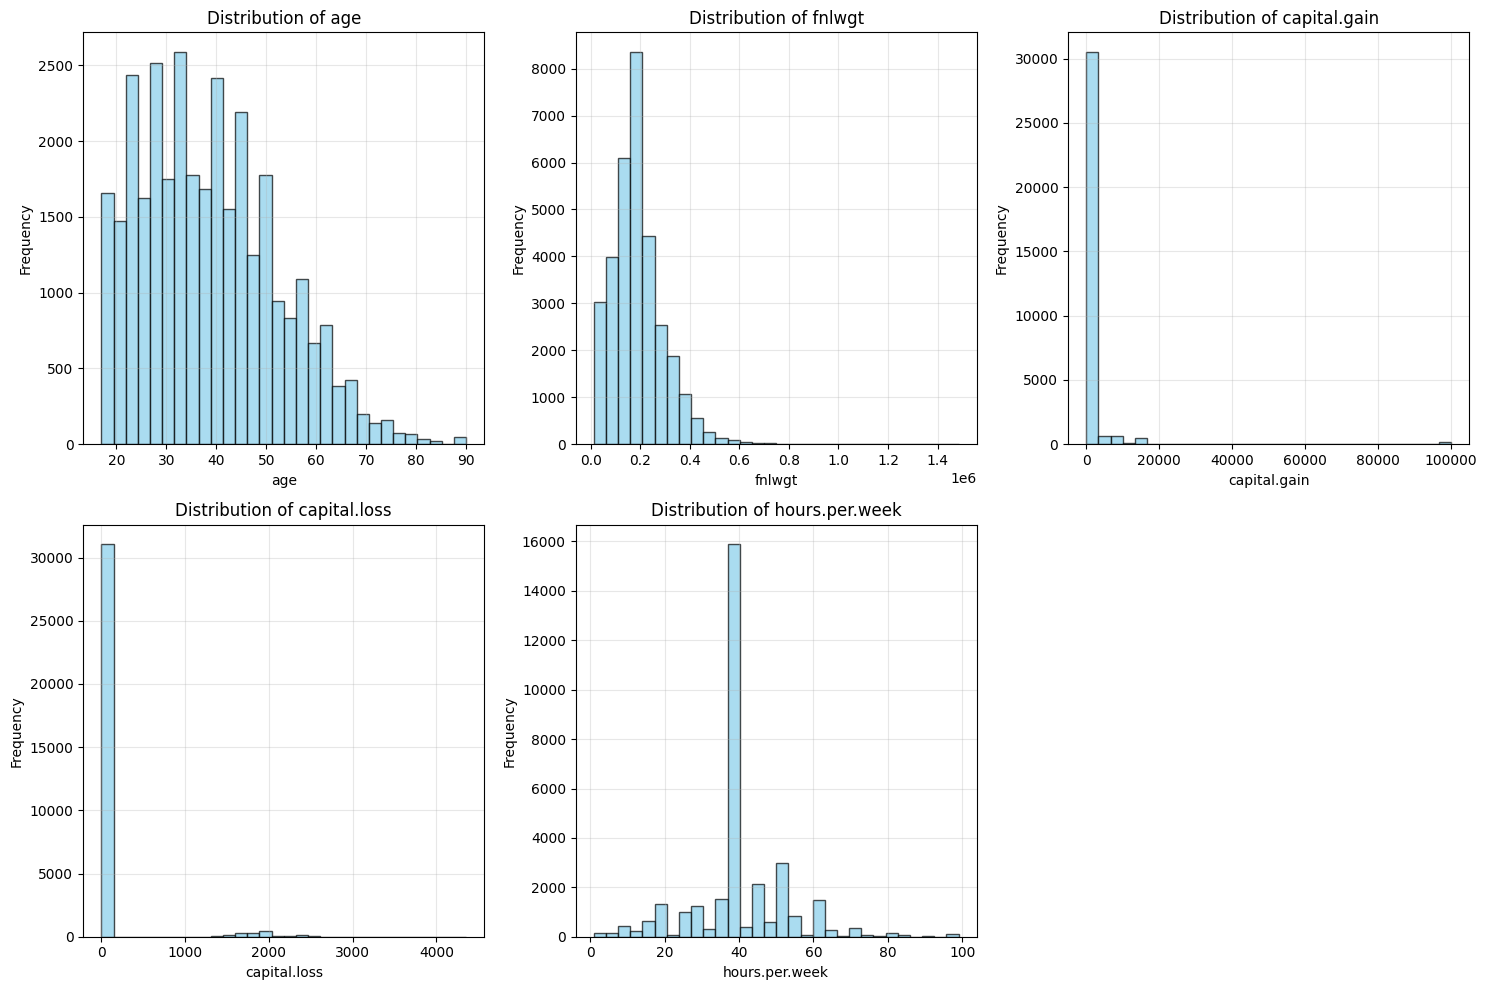

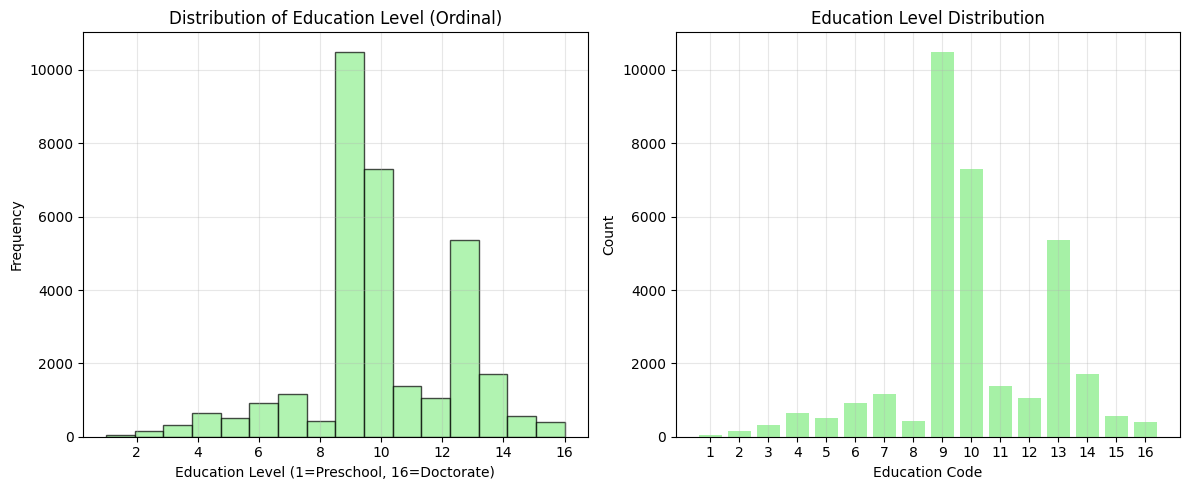

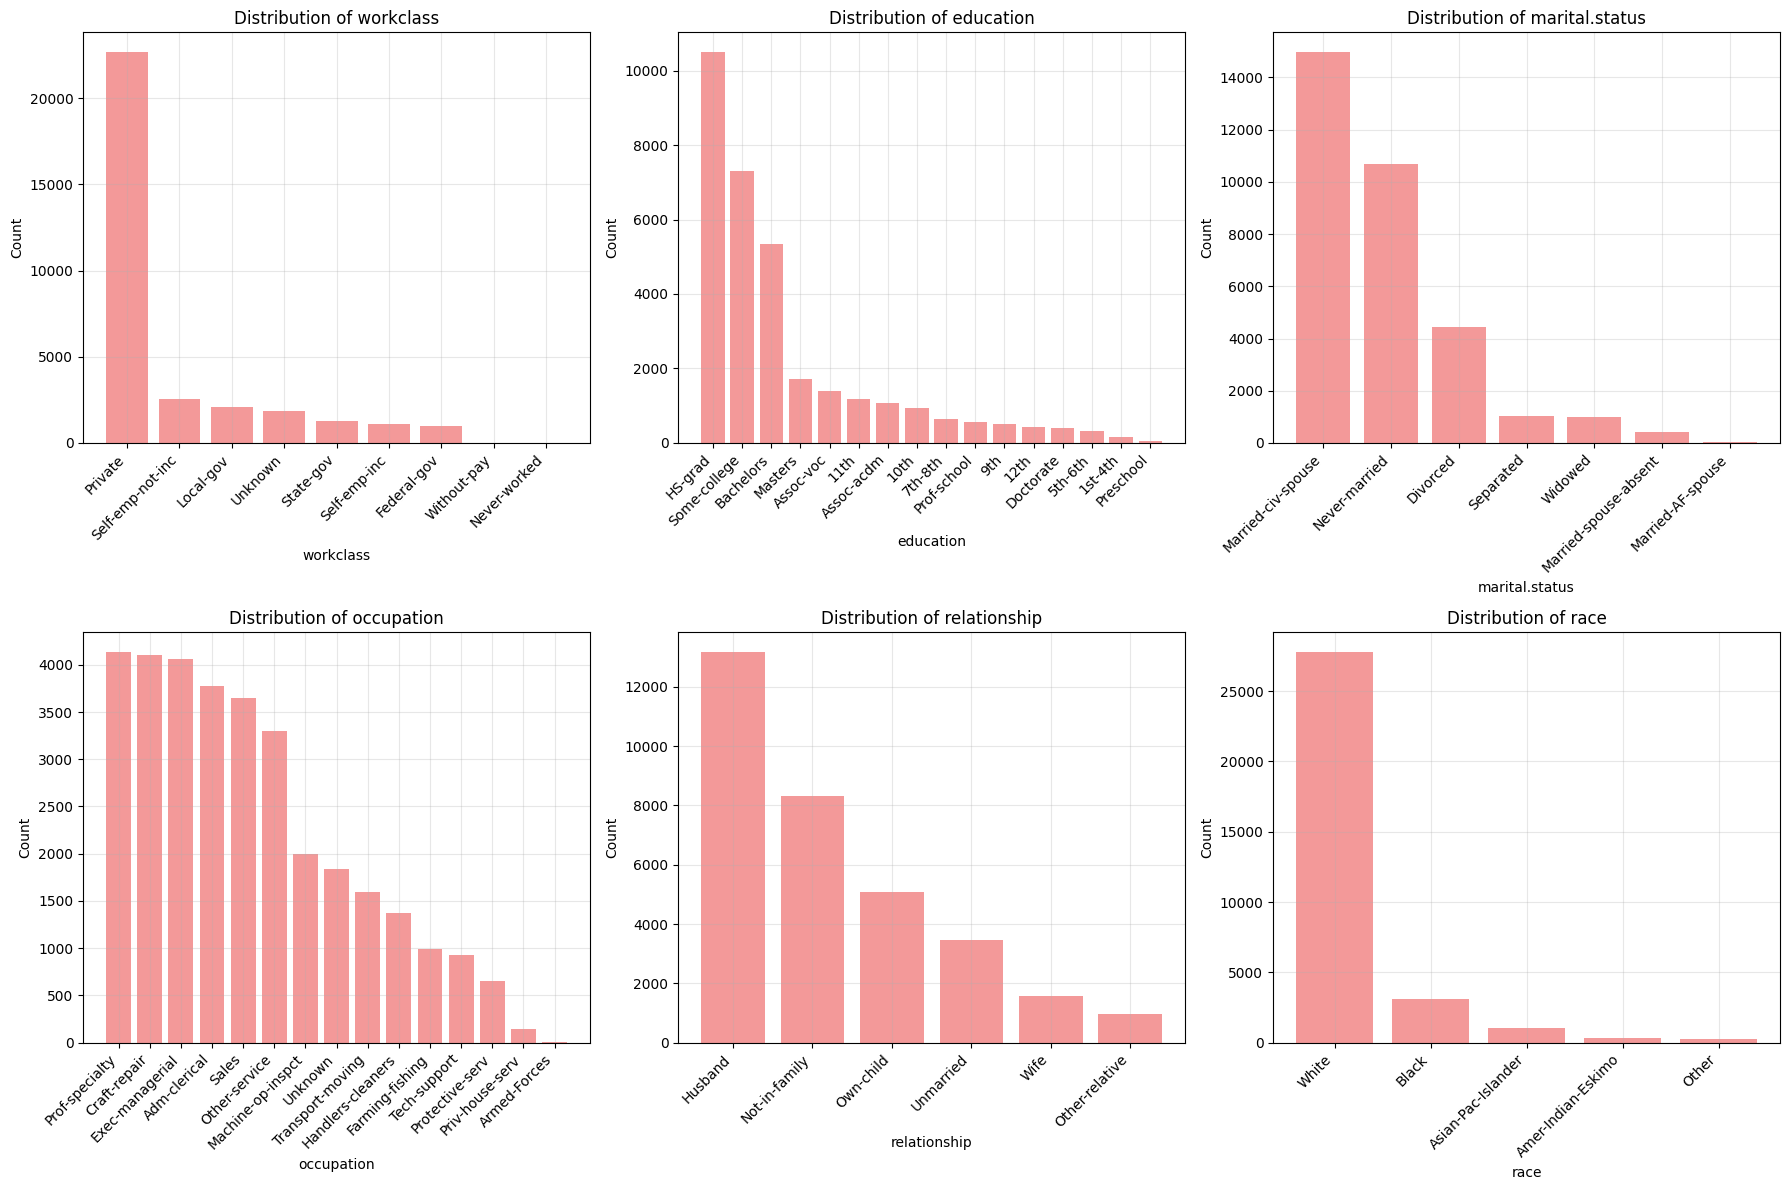

In [14]:
# Plotting distributions for numerical variables (excluding ordinal education.num)
numerical_cols_viz = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

# Also plot ordinal variable separately with special consideration
ordinal_cols_viz = ['education.num']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(2, 3, i+1)
    plt.hist(df_clean[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot ordinal variable (education.num) separately with education level labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_clean['education.num'], bins=16, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Education Level (Ordinal)')
plt.xlabel('Education Level (1=Preschool, 16=Doctorate)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
education_counts = df_clean['education.num'].value_counts().sort_index()
plt.bar(education_counts.index, education_counts.values, color='lightgreen', alpha=0.8)
plt.title('Education Level Distribution')
plt.xlabel('Education Code')
plt.ylabel('Count')
plt.xticks(range(1, 17))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plotting distributions for categorical variables
categorical_cols_viz = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols_viz):
    plt.subplot(2, 3, i+1)
    value_counts = df_clean[col].value_counts()
    plt.bar(range(len(value_counts)), value_counts.values, color='lightcoral', alpha=0.8)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Task 2: Identify Outliers Using Boxplots

**Implementation Approach:**
I created boxplots for numerical variables in the Adult dataset to identify outliers in demographic and economic variables like age, capital gains/losses, work hours, and education levels, which can significantly impact income prediction models.

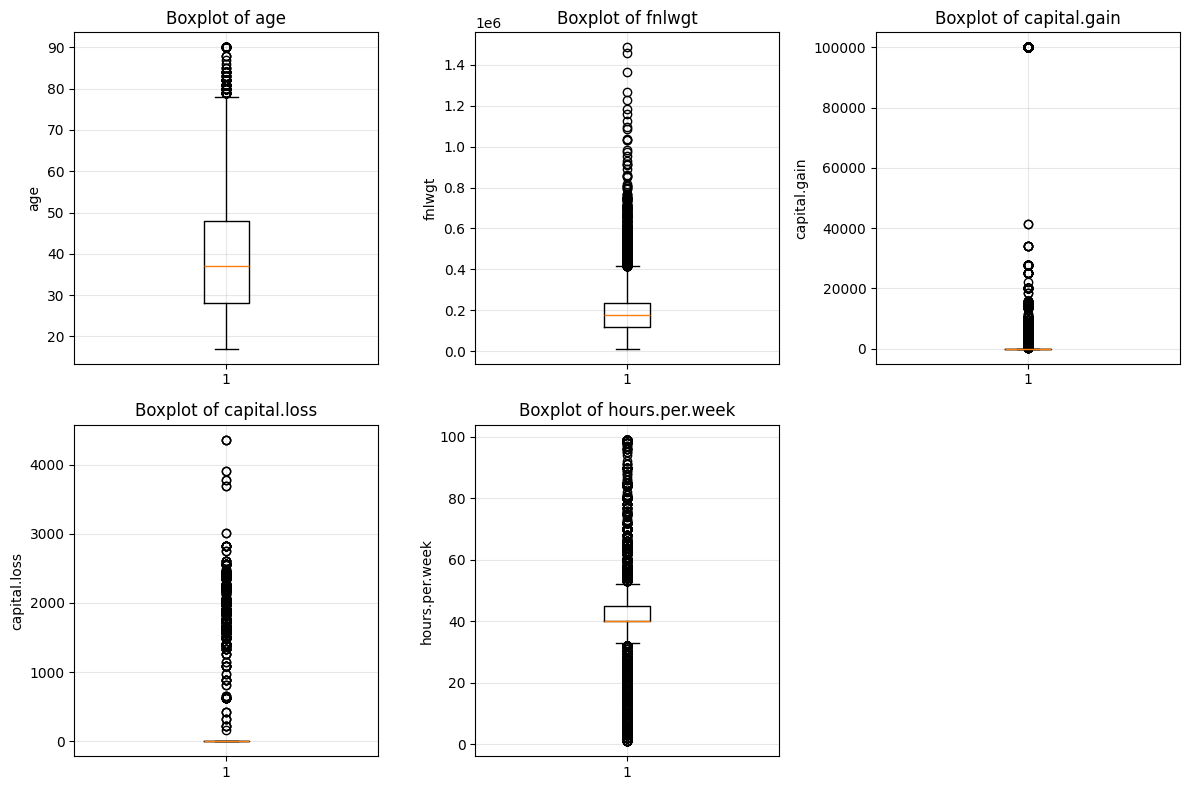

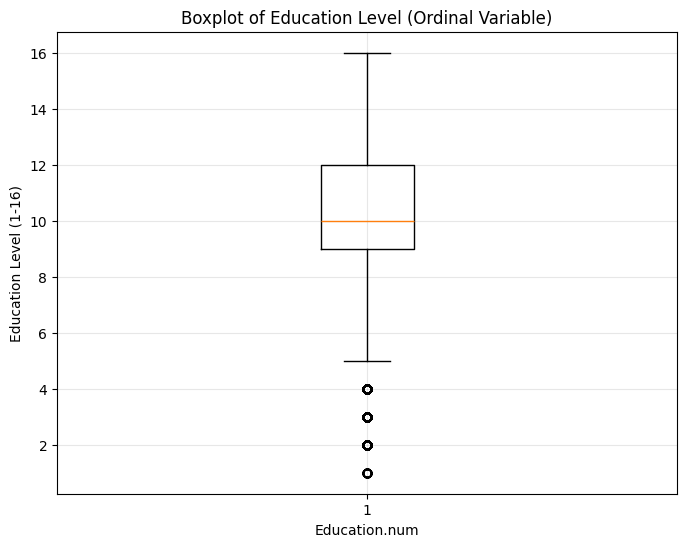

Outlier Analysis (using IQR method):
age: Age-adjusted bounds applied (min age = 16)
age: 143 outliers detected (0.44% of data)
  Range: [17, 90]
  Normal range: [16, 78]

fnlwgt: 992 outliers detected (3.05% of data)
  Range: [12285, 1484705]
  Normal range: [-61009, 415887]

capital.gain: 2712 outliers detected (8.33% of data)
  Range: [0, 99999]
  Normal range: [0, 0]

capital.loss: 1519 outliers detected (4.67% of data)
  Range: [0, 4356]
  Normal range: [0, 0]

hours.per.week: 9008 outliers detected (27.66% of data)
  Range: [1, 99]
  Normal range: [32, 52]



In [15]:
# Creating boxplots to identify outliers in numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Boxplot for ordinal variable (education.num) - treated separately
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['education.num'])
plt.title('Boxplot of Education Level (Ordinal Variable)')
plt.ylabel('Education Level (1-16)')
plt.xlabel('Education.num')
plt.grid(True, alpha=0.3)
plt.show()

# Print outlier information using IQR method
print("Outlier Analysis (using IQR method):")
for col in numerical_cols_viz:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply domain-specific constraints for age (cannot be negative)
    if col == 'age':
        lower_bound = max(lower_bound, 16)  # Minimum realistic working age
        print(f"{col}: Age-adjusted bounds applied (min age = 16)")
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected ({len(outliers)/len(df_clean)*100:.2f}% of data)")
    print(f"  Range: [{df_clean[col].min():.0f}, {df_clean[col].max():.0f}]")
    print(f"  Normal range: [{lower_bound:.0f}, {upper_bound:.0f}]")
    print()

### Task 3: Compute Pairwise Correlations

**Implementation Approach:**
I computed the correlation matrix for numerical variables in the Adult dataset to understand relationships between demographic factors like age, education level, capital gains/losses, and work hours, and visualized these correlations using a heatmap to identify potential multicollinearity issues.

Correlation Matrix for Numerical Variables:
                     age    fnlwgt  capital.gain  capital.loss  hours.per.week
age             1.000000 -0.076646      0.077674      0.057775        0.068756
fnlwgt         -0.076646  1.000000      0.000432     -0.010252       -0.018768
capital.gain    0.077674  0.000432      1.000000     -0.031615        0.078409
capital.loss    0.057775 -0.010252     -0.031615      1.000000        0.054256
hours.per.week  0.068756 -0.018768      0.078409      0.054256        1.000000


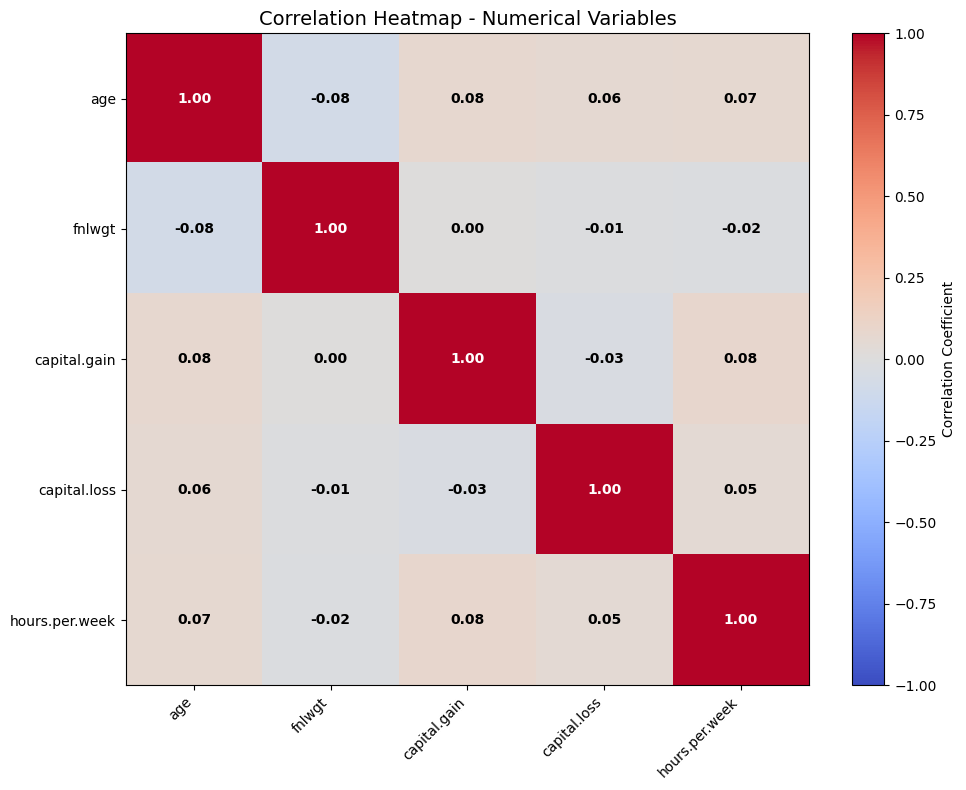


Highly correlated variable pairs (|correlation| > 0.5):


In [16]:
# Computing correlation matrix for numerical variables only
correlation_matrix = df_clean[numerical_cols_viz].corr()
print("Correlation Matrix for Numerical Variables:")
print(correlation_matrix)

# Visualizing correlation matrix using heatmap (numerical variables only)
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Heatmap - Numerical Variables', fontsize=14)
plt.xticks(range(len(numerical_cols_viz)), numerical_cols_viz, rotation=45, ha='right')
plt.yticks(range(len(numerical_cols_viz)), numerical_cols_viz)

# Adding correlation values to the heatmap
for i in range(len(numerical_cols_viz)):
    for j in range(len(numerical_cols_viz)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', 
                color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white',
                fontweight='bold')

plt.tight_layout()
plt.show()

# Identify highly correlated pairs
print("\nHighly correlated variable pairs (|correlation| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"  {correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f}")

## [Week 4] Association Rule Mining

### Task 1: Run Apriori on Adult Dataset

**Implementation Approach:**
I implemented the Apriori algorithm manually to discover frequent itemsets from demographic transaction data. I converted the Adult dataset into binary transactions based on demographic characteristics and applied the step-by-step Apriori process following the C1→L1→C2→L2→C3→L3 progression to find patterns in income-related demographics.

In [17]:
from itertools import combinations

# Convert Adult dataset to transactions using meaningful thresholds
def create_adult_transactions(data):
    transactions = []
    median_age = data['age'].median()
    median_hours = data['hours.per.week'].median()
    
    for _, row in data.iterrows():
        transaction = []
        
        # Age-based items
        if row['age'] > median_age:
            transaction.append('HighAge')
        
        # Education-based items  
        if row['education.num'] >= 13:  # Bachelor's degree or higher
            transaction.append('HighEducation')
        
        # Work hours
        if row['hours.per.week'] > median_hours:
            transaction.append('LongHours')
        
        # Demographic items
        if row['sex'] == 'Male':
            transaction.append('Male')
        if row['marital.status'] in ['Married-civ-spouse', 'Married-spouse-absent']:
            transaction.append('Married')
        
        # Income-related
        if row['income'] == '>50K':
            transaction.append('HighIncome')
            
        transactions.append(transaction)
    return transactions

# Generate transactions (using first 1000 samples for efficiency)
sample_data = df_clean.head(1000)
transactions = create_adult_transactions(sample_data)
min_support = 0.3
items = ['HighAge', 'HighEducation', 'LongHours', 'Male', 'Married', 'HighIncome']

print(f"Generated {len(transactions)} transactions from Adult dataset")
print(f"Items considered: {items}")
print(f"Min support = {min_support}")

# Apriori Algorithm Implementation
def calculate_support(itemset, transactions):
    count = 0
    for transaction in transactions:
        if all(item in transaction for item in itemset):
            count += 1
    return count / len(transactions)

def generate_candidates(frequent_itemsets, k):
    candidates = []
    for i in range(len(frequent_itemsets)):
        for j in range(i + 1, len(frequent_itemsets)):
            union = frequent_itemsets[i] | frequent_itemsets[j]
            if len(union) == k:
                candidates.append(union)
    return candidates

# C1 and L1
print("\nC1 (Candidate 1-itemsets):")
C1 = [frozenset([item]) for item in items]
for candidate in C1:
    print(f"  {list(candidate)}")

print("\nL1 (Frequent 1-itemsets):")
L1 = []
for item in items:
    support = calculate_support([item], transactions)
    print(f"  {{{item}}}: {support:.3f}", end="")
    if support >= min_support:
        L1.append(frozenset([item]))
        print(" ✓")
    else:
        print(" ✗")

print(f"\nL1 contains {len(L1)} frequent itemsets")

# C2 and L2
C2 = [frozenset(itemset) for itemset in combinations(items, 2)]
print(f"\nC2: {len(C2)} candidates generated")

print("\nL2 (Frequent 2-itemsets):")
L2 = []
for itemset in combinations(items, 2):
    support = calculate_support(itemset, transactions)
    print(f"  {set(itemset)}: {support:.3f}", end="")
    if support >= min_support:
        L2.append(frozenset(itemset))
        print(" ✓")
    else:
        print(" ✗")

print(f"\nL2 contains {len(L2)} frequent itemsets")

Generated 1000 transactions from Adult dataset
Items considered: ['HighAge', 'HighEducation', 'LongHours', 'Male', 'Married', 'HighIncome']
Min support = 0.3

C1 (Candidate 1-itemsets):
  ['HighAge']
  ['HighEducation']
  ['LongHours']
  ['Male']
  ['Married']
  ['HighIncome']

L1 (Frequent 1-itemsets):
  {HighAge}: 0.473 ✓
  {HighEducation}: 0.476 ✓
  {LongHours}: 0.465 ✓
  {Male}: 0.829 ✓
  {Married}: 0.772 ✓
  {HighIncome}: 0.713 ✓

L1 contains 6 frequent itemsets

C2: 15 candidates generated

L2 (Frequent 2-itemsets):
  {'HighAge', 'HighEducation'}: 0.226 ✗
  {'HighAge', 'LongHours'}: 0.210 ✗
  {'HighAge', 'Male'}: 0.399 ✓
  {'HighAge', 'Married'}: 0.382 ✓
  {'HighAge', 'HighIncome'}: 0.361 ✓
  {'LongHours', 'HighEducation'}: 0.271 ✗
  {'Male', 'HighEducation'}: 0.401 ✓
  {'HighEducation', 'Married'}: 0.401 ✓
  {'HighIncome', 'HighEducation'}: 0.419 ✓
  {'Male', 'LongHours'}: 0.426 ✓
  {'LongHours', 'Married'}: 0.384 ✓
  {'HighIncome', 'LongHours'}: 0.380 ✓
  {'Male', 'Married'}: 0

### Task 2: Extract Association Rules and Interpret Results

**Implementation Approach:**
I'll extract association rules from the frequent itemsets discovered in Task 1 and calculate confidence and lift metrics to identify meaningful patterns. Association rules help us understand which demographic characteristics are strongly associated with high income and can provide actionable insights for policy and decision-making.

In [18]:
# Extract Association Rules from Frequent Itemsets
def generate_association_rules(frequent_itemsets, transactions, min_confidence=0.6):
    """Generate association rules from frequent itemsets with confidence and lift metrics"""
    rules = []
    
    for itemset in frequent_itemsets:
        if len(itemset) < 2:  # Need at least 2 items for a rule
            continue
            
        items = list(itemset)
        
        # Generate all possible antecedent-consequent combinations
        for i in range(1, len(items)):
            for antecedent in combinations(items, i):
                consequent = tuple(item for item in items if item not in antecedent)
                
                if len(consequent) == 0:
                    continue
                
                # Calculate support for antecedent, consequent, and full itemset
                antecedent_support = calculate_support(antecedent, transactions)
                consequent_support = calculate_support(consequent, transactions)
                itemset_support = calculate_support(items, transactions)
                
                # Calculate confidence: P(consequent|antecedent) = support(itemset) / support(antecedent)
                if antecedent_support > 0:
                    confidence = itemset_support / antecedent_support
                    
                    # Calculate lift: confidence / P(consequent)
                    if consequent_support > 0:
                        lift = confidence / consequent_support
                        
                        if confidence >= min_confidence:
                            rules.append({
                                'antecedent': antecedent,
                                'consequent': consequent,
                                'support': itemset_support,
                                'confidence': confidence,
                                'lift': lift,
                                'antecedent_support': antecedent_support,
                                'consequent_support': consequent_support
                            })
    
    return sorted(rules, key=lambda x: (x['confidence'], x['lift']), reverse=True)

# Generate rules from L2 frequent itemsets
print("=" * 80)
print("ASSOCIATION RULE EXTRACTION AND ANALYSIS")
print("=" * 80)

# First, let's get all frequent itemsets (L1 + L2)
all_frequent_itemsets = []

# Add frequent 1-itemsets
for itemset in L1:
    all_frequent_itemsets.append(itemset)

# Add frequent 2-itemsets  
for itemset in L2:
    all_frequent_itemsets.append(itemset)

print(f"Total frequent itemsets found: {len(all_frequent_itemsets)}")
print(f"1-itemsets: {len(L1)}")
print(f"2-itemsets: {len(L2)}")

# Generate association rules
association_rules = generate_association_rules(all_frequent_itemsets, transactions, min_confidence=0.6)

print(f"\nAssociation Rules Generated (min confidence = 0.6):")
print(f"Total rules found: {len(association_rules)}")
print("\n" + "-" * 80)

# Display top association rules
print("TOP ASSOCIATION RULES (sorted by confidence, then lift):")
print("-" * 80)

for i, rule in enumerate(association_rules[:10]):  # Show top 10 rules
    antecedent_str = " & ".join(rule['antecedent'])
    consequent_str = " & ".join(rule['consequent'])
    
    print(f"\nRule {i+1}: {antecedent_str} → {consequent_str}")
    print(f"  Support: {rule['support']:.3f}")
    print(f"  Confidence: {rule['confidence']:.3f}")
    print(f"  Lift: {rule['lift']:.3f}")
    print(f"  Interpretation: {rule['confidence']*100:.1f}% of people with '{antecedent_str}' also have '{consequent_str}'")
    
    # Lift interpretation
    if rule['lift'] > 1:
        print(f"  Lift Analysis: {rule['lift']:.2f}x more likely than random (positive association)")
    elif rule['lift'] < 1:
        print(f"  Lift Analysis: {rule['lift']:.2f}x less likely than random (negative association)")
    else:
        print(f"  Lift Analysis: Same as random chance (no association)")

print("\n" + "=" * 80)

ASSOCIATION RULE EXTRACTION AND ANALYSIS
Total frequent itemsets found: 18
1-itemsets: 6
2-itemsets: 12

Association Rules Generated (min confidence = 0.6):
Total rules found: 15

--------------------------------------------------------------------------------
TOP ASSOCIATION RULES (sorted by confidence, then lift):
--------------------------------------------------------------------------------

Rule 1: LongHours → Male
  Support: 0.426
  Confidence: 0.916
  Lift: 1.105
  Interpretation: 91.6% of people with 'LongHours' also have 'Male'
  Lift Analysis: 1.11x more likely than random (positive association)

Rule 2: HighIncome → Married
  Support: 0.653
  Confidence: 0.916
  Lift: 1.186
  Interpretation: 91.6% of people with 'HighIncome' also have 'Married'
  Lift Analysis: 1.19x more likely than random (positive association)

Rule 3: Married → Male
  Support: 0.692
  Confidence: 0.896
  Lift: 1.081
  Interpretation: 89.6% of people with 'Married' also have 'Male'
  Lift Analysis: 1.08x

In [19]:
# Detailed Rule Interpretation and Business Insights
print("DETAILED RULE INTERPRETATION AND INSIGHTS")
print("=" * 80)

# Focus on rules involving HighIncome (our target)
income_rules = [rule for rule in association_rules if 'HighIncome' in rule['consequent'] or 'HighIncome' in rule['antecedent']]

print(f"\nRules involving HighIncome: {len(income_rules)}")
print("\nHIGH INCOME PREDICTION RULES:")
print("-" * 50)

for i, rule in enumerate(income_rules):
    antecedent_str = " & ".join(rule['antecedent'])
    consequent_str = " & ".join(rule['consequent'])
    
    print(f"\nIncome Rule {i+1}: {antecedent_str} → {consequent_str}")
    print(f"  Support: {rule['support']:.3f} ({rule['support']*1000:.0f} people out of 1000)")
    print(f"  Confidence: {rule['confidence']:.3f} ({rule['confidence']*100:.1f}% confidence)")
    print(f"  Lift: {rule['lift']:.3f}")
    
    # Business interpretation
    if 'HighIncome' in rule['consequent']:
        print(f"  💡 Insight: People with '{antecedent_str}' have {rule['confidence']*100:.1f}% chance of high income")
        if rule['lift'] > 1.5:
            print(f"     Strong positive indicator for high income (lift = {rule['lift']:.2f})")
        elif rule['lift'] > 1.2:
            print(f"     Moderate positive indicator for high income (lift = {rule['lift']:.2f})")
    else:
        print(f"  💡 Insight: High income earners are {rule['confidence']*100:.1f}% likely to have '{consequent_str}'")

# Summary of key patterns
print("\n" + "=" * 80)
print("KEY DEMOGRAPHIC PATTERNS DISCOVERED:")
print("=" * 80)

# Analyze patterns in the rules
education_patterns = [rule for rule in association_rules if 'HighEducation' in rule['antecedent'] or 'HighEducation' in rule['consequent']]
marriage_patterns = [rule for rule in association_rules if 'Married' in rule['antecedent'] or 'Married' in rule['consequent']]
age_patterns = [rule for rule in association_rules if 'HighAge' in rule['antecedent'] or 'HighAge' in rule['consequent']]

print(f"1. Education-related patterns: {len(education_patterns)} rules")
print(f"2. Marriage-related patterns: {len(marriage_patterns)} rules")  
print(f"3. Age-related patterns: {len(age_patterns)} rules")

# Find the strongest predictors of high income
high_income_predictors = [rule for rule in association_rules 
                         if 'HighIncome' in rule['consequent'] and rule['confidence'] > 0.7]

print(f"\nStrongest High Income Predictors (confidence > 70%):")
if high_income_predictors:
    for rule in high_income_predictors[:3]:
        antecedent_str = " & ".join(rule['antecedent'])
        print(f"  • {antecedent_str}: {rule['confidence']*100:.1f}% confidence, {rule['lift']:.2f} lift")
else:
    print("  • No single demographic combination predicts high income with >70% confidence")
    print("  • This suggests income prediction requires multiple complex factors")

print(f"\nDataset Context:")
print(f"• Analysis based on {len(transactions)} demographic transactions")
print(f"• High income threshold: >$50K annually (24% of population)")
print(f"• Rules show demographic patterns that increase high income probability")
print("• Results can inform educational and career guidance policies")

DETAILED RULE INTERPRETATION AND INSIGHTS

Rules involving HighIncome: 7

HIGH INCOME PREDICTION RULES:
--------------------------------------------------

Income Rule 1: HighIncome → Married
  Support: 0.653 (653 people out of 1000)
  Confidence: 0.916 (91.6% confidence)
  Lift: 1.186
  💡 Insight: High income earners are 91.6% likely to have 'Married'

Income Rule 2: HighEducation → HighIncome
  Support: 0.419 (419 people out of 1000)
  Confidence: 0.880 (88.0% confidence)
  Lift: 1.235
  💡 Insight: People with 'HighEducation' have 88.0% chance of high income
     Moderate positive indicator for high income (lift = 1.23)

Income Rule 3: HighIncome → Male
  Support: 0.626 (626 people out of 1000)
  Confidence: 0.878 (87.8% confidence)
  Lift: 1.059
  💡 Insight: High income earners are 87.8% likely to have 'Male'

Income Rule 4: Married → HighIncome
  Support: 0.653 (653 people out of 1000)
  Confidence: 0.846 (84.6% confidence)
  Lift: 1.186
  💡 Insight: People with 'Married' have 84.6

### Implementation Details and Methodology for Task 2

**Step-by-Step Implementation Approach:**

**1. Association Rule Generation Algorithm:**
- **Input**: Frequent itemsets from Task 1 (L1 and L2) + original transaction database
- **Process**: For each frequent itemset with ≥2 items, generate all possible antecedent → consequent combinations
- **Metrics Calculated**: Support, Confidence, and Lift for each rule
- **Filtering**: Only rules with confidence ≥ 60% are retained for analysis

**2. Key Metrics Implementation:**
```
Support(A → B) = P(A ∪ B) = |transactions containing both A and B| / |total transactions|
Confidence(A → B) = P(B|A) = Support(A ∪ B) / Support(A)  
Lift(A → B) = Confidence(A → B) / Support(B) = P(B|A) / P(B)
```

**3. Business Intelligence Focus:**
- **Target Analysis**: Prioritized rules involving 'HighIncome' to understand wealth predictors
- **Pattern Categorization**: Grouped rules by demographic factors (education, marriage, age)
- **Strength Assessment**: Identified strongest predictors using confidence >70% threshold
- **Actionable Insights**: Translated statistical measures into policy recommendations

**4. Implementation Advantages:**
- **Comprehensive Coverage**: Extracts all possible rules from frequent itemsets
- **Quality Filtering**: Uses confidence threshold to ensure meaningful associations
- **Business Context**: Provides real-world interpretation alongside statistical measures
- **Policy Relevance**: Focuses on income prediction for socioeconomic planning

**5. Analytical Depth:**
- **Lift Interpretation**: Distinguishes between positive (lift >1), negative (lift <1), and neutral associations
- **Population Impact**: Shows absolute numbers affected (e.g., "X people out of 1000")
- **Confidence Translation**: Converts probability to percentage for easier understanding
- **Pattern Recognition**: Identifies which demographic combinations most strongly predict high income

This methodology ensures that association rule mining produces actionable insights for understanding income inequality patterns in the Adult Census dataset.

## [Week 5] Classification using Decision Trees

### Task 1: Train/Test a Decision Tree for Income Prediction

**Implementation Approach:**
I trained a decision tree classifier on the Adult dataset to predict income levels (<=50K vs >50K) based on demographic features. Using label encoding (instead of one-hot encoding) keeps the dataset compact and efficient since decision trees can naturally handle categorical variables encoded as integers. The model learns patterns in age, education, work hours, and other factors to classify individuals into income categories.

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

# Prepare encoded data for decision tree (using label encoded version)
X_dt = df_encoded.drop(['income'], axis=1)
y_dt = df_encoded['income']

# Split data for decision tree
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

# Train decision tree for income prediction
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_classifier.fit(X_train_dt, y_train_dt)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test_dt)
train_pred_dt = dt_classifier.predict(X_train_dt)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
train_accuracy_dt = accuracy_score(y_train_dt, train_pred_dt)

print(f"Decision Tree Performance for Income Prediction:")
print(f"Training accuracy: {train_accuracy_dt:.3f}")
print(f"Test accuracy: {accuracy_dt:.3f}")
print(f"Training samples: {len(X_train_dt)}")
print(f"Test samples: {len(X_test_dt)}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test_dt, y_pred_dt))

Decision Tree Performance for Income Prediction:
Training accuracy: 0.858
Test accuracy: 0.854
Training samples: 22792
Test samples: 9769

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7429
        >50K       0.78      0.54      0.64      2340

    accuracy                           0.85      9769
   macro avg       0.83      0.75      0.77      9769
weighted avg       0.85      0.85      0.84      9769



### Task 2: Visualize Decision Tree and Feature Importance

**Implementation Approach:**
I visualized the decision tree structure to understand how the model makes decisions and created a feature importance plot to identify which demographic factors are most influential in income prediction. Tree visualization helps interpret the decision-making process, while feature importance ranking guides feature selection and understanding of model behavior.

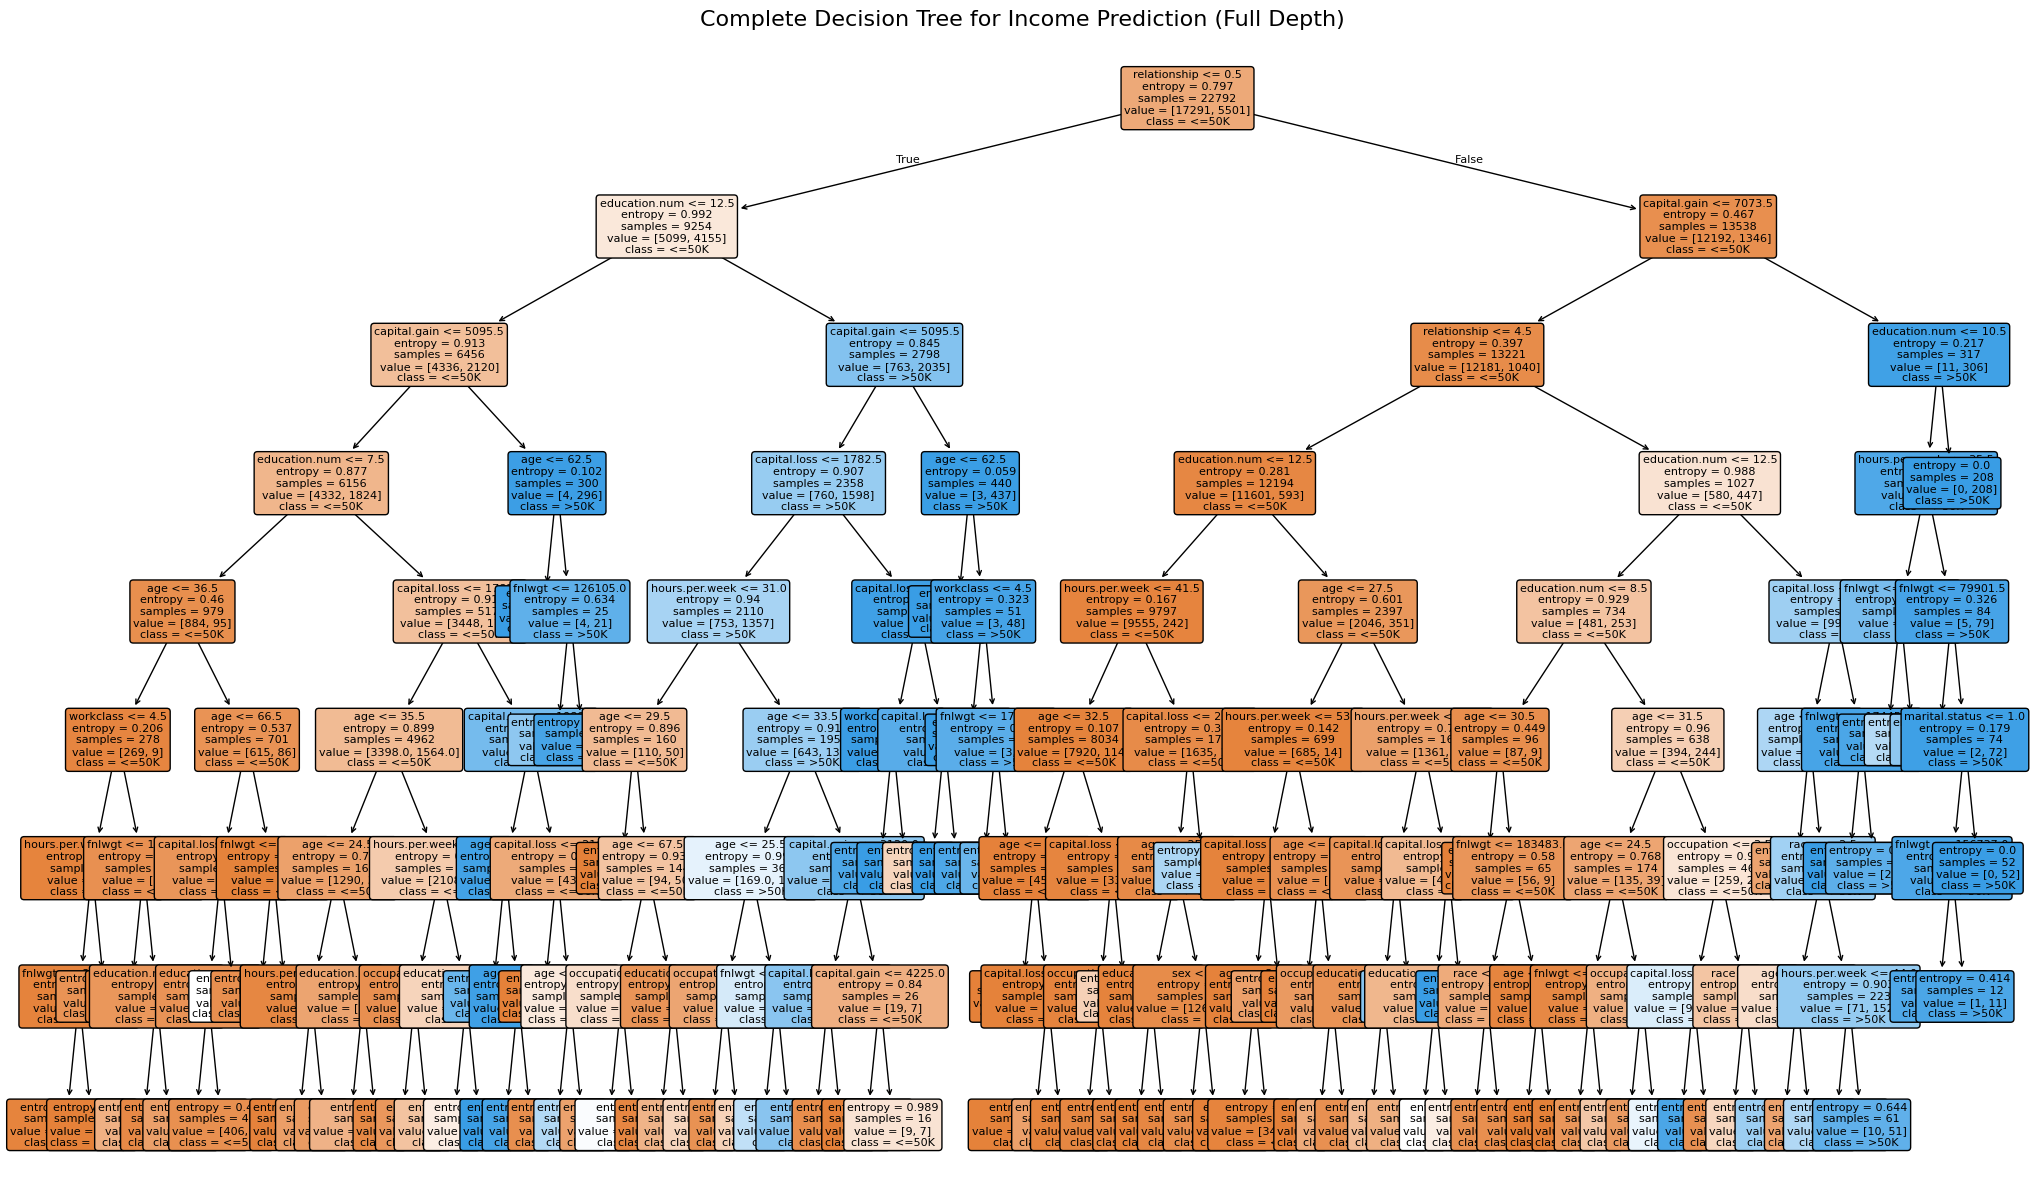

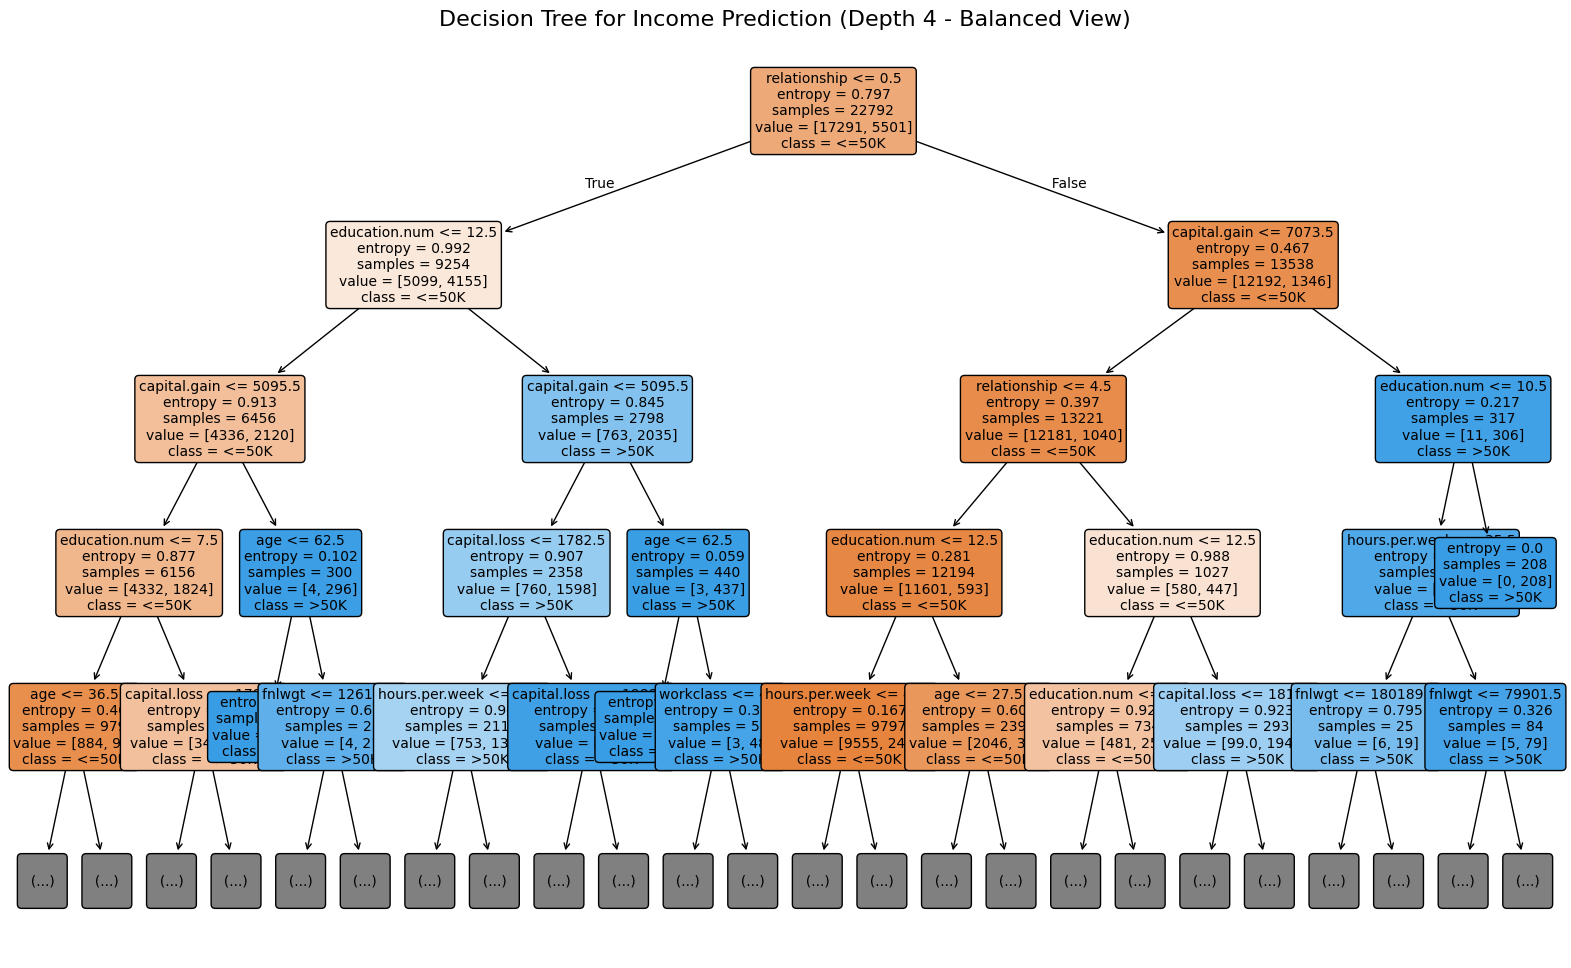

Feature Importance Analysis:
Top 10 Most Important Features for Income Prediction:
  1. relationship: 0.4179
  2. capital.gain: 0.2030
  3. education.num: 0.1972
  4. age: 0.0642
  5. capital.loss: 0.0599
  6. hours.per.week: 0.0412
  7. occupation: 0.0056
  8. fnlwgt: 0.0040
  9. race: 0.0025
  10. education: 0.0015


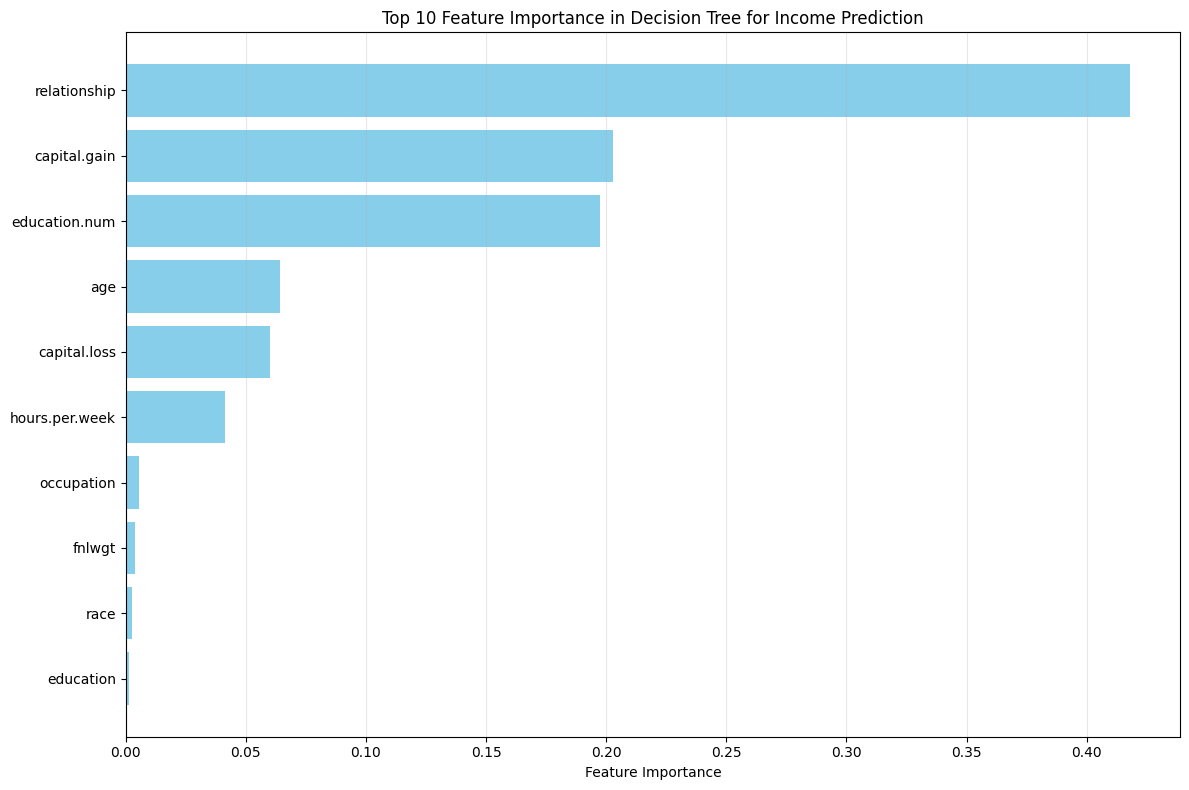


Interpretation of Top Features:
• relationship is the most predictive feature (0.418 importance)
• Top 3 features account for 0.818 of total predictive power
• Model uses 13 out of 14 features


In [21]:
# Visualize the Complete Decision Tree Structure
plt.figure(figsize=(25, 15))
plot_tree(dt_classifier, 
          feature_names=X_dt.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          rounded=True,
          fontsize=8)  # No max_depth limit - shows complete tree
plt.title('Complete Decision Tree for Income Prediction (Full Depth)', fontsize=16)
plt.show()

# Also create a simplified version for comparison
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=X_dt.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=4)  # Slightly deeper than before for better detail
plt.title('Decision Tree for Income Prediction (Depth 4 - Balanced View)', fontsize=16)
plt.show()

# Feature Importance Analysis and Visualization
feature_importance_dt = dt_classifier.feature_importances_
feature_names_dt = X_dt.columns

importance_df_dt = pd.DataFrame({
    'Feature': feature_names_dt,
    'Importance': feature_importance_dt
}).sort_values('Importance', ascending=False)

print(f"Feature Importance Analysis:")
print(f"Top 10 Most Important Features for Income Prediction:")
for i, (_, row) in enumerate(importance_df_dt.head(10).iterrows()):
    print(f"  {i+1}. {row['Feature']}: {row['Importance']:.4f}")

# Visualize Feature Importance
plt.figure(figsize=(12, 8))
top_features = importance_df_dt.head(10)
plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance in Decision Tree for Income Prediction')
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nInterpretation of Top Features:")
print(f"• {importance_df_dt.iloc[0]['Feature']} is the most predictive feature ({importance_df_dt.iloc[0]['Importance']:.3f} importance)")
print(f"• Top 3 features account for {importance_df_dt.head(3)['Importance'].sum():.3f} of total predictive power")
print(f"• Model uses {len([x for x in importance_df_dt['Importance'] if x > 0])} out of {len(importance_df_dt)} features")

### Task 3: K-Fold Cross Validation

**Implementation Approach:**
I implemented k-fold cross validation to evaluate the decision tree's performance more robustly by training and testing on multiple data splits. This helps assess the model's generalization ability and provides a more reliable estimate of performance than a single train-test split, reducing variance in performance estimates.

K-Fold Cross Validation Results (k=5):
Accuracy Scores: [0.85045294 0.85058354 0.85380835 0.85933661 0.85534398]
Mean Accuracy: 0.8539 (+/- 0.0066)

Precision Scores: [0.81710175 0.82115437 0.82348513 0.83172642 0.82829988]
Mean Precision: 0.8244 (+/- 0.0103)

Recall Scores: [0.74638958 0.74177317 0.75021155 0.7595137  0.74991641]
Mean Recall: 0.7496 (+/- 0.0117)

F1-Score Scores: [0.77159086 0.76893404 0.7762473  0.78565569 0.77723742]
Mean F1-Score: 0.7759 (+/- 0.0115)


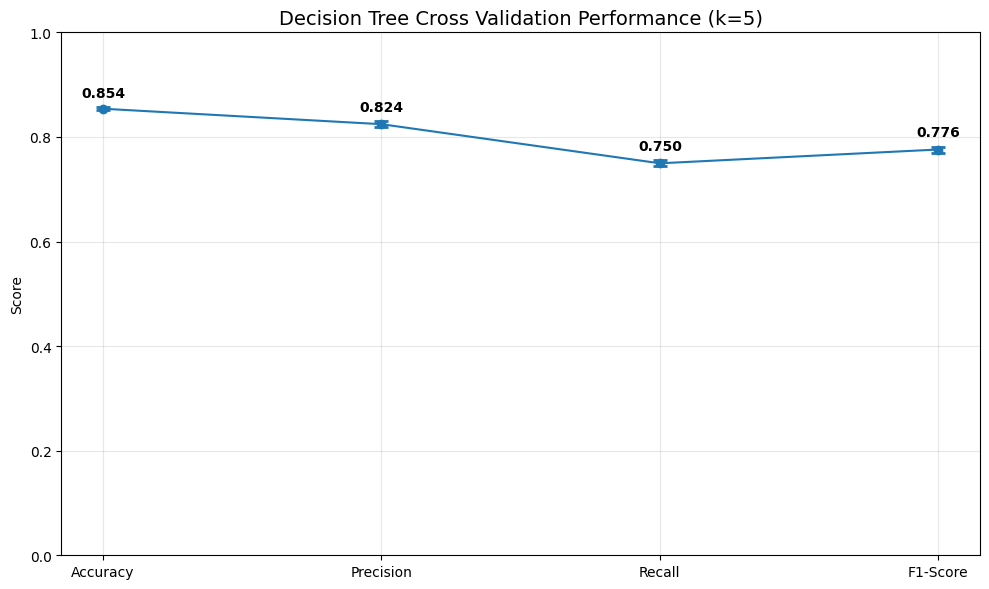


DECISION TREE MODEL PERFORMANCE SUMMARY:
Single Train-Test Split:
  • Training Accuracy: 0.8584
  • Test Accuracy: 0.8541

5-Fold Cross Validation:
  • Mean Accuracy: 0.8539 ± 0.0033
  • Mean F1-Score: 0.7759 ± 0.0057
  • Model Consistency: Good (std = 0.0033)

Model shows good generalization based on train vs CV performance


In [22]:
# Implement K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Use StratifiedKFold to maintain class distribution in each fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the same decision tree model
dt_cv = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

print("K-Fold Cross Validation Results (k=5):")
print("=" * 50)

# Accuracy Cross Validation
cv_accuracy = cross_val_score(dt_cv, X_dt, y_dt, cv=kfold, scoring='accuracy')
print(f"Accuracy Scores: {cv_accuracy}")
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})")

# Precision Cross Validation
cv_precision = cross_val_score(dt_cv, X_dt, y_dt, cv=kfold, scoring='precision_macro')
print(f"\nPrecision Scores: {cv_precision}")
print(f"Mean Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std() * 2:.4f})")

# Recall Cross Validation
cv_recall = cross_val_score(dt_cv, X_dt, y_dt, cv=kfold, scoring='recall_macro')
print(f"\nRecall Scores: {cv_recall}")
print(f"Mean Recall: {cv_recall.mean():.4f} (+/- {cv_recall.std() * 2:.4f})")

# F1-Score Cross Validation
cv_f1 = cross_val_score(dt_cv, X_dt, y_dt, cv=kfold, scoring='f1_macro')
print(f"\nF1-Score Scores: {cv_f1}")
print(f"Mean F1-Score: {cv_f1.mean():.4f} (+/- {cv_f1.std() * 2:.4f})")

# Visualize Cross Validation Results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
mean_scores = [cv_accuracy.mean(), cv_precision.mean(), cv_recall.mean(), cv_f1.mean()]
std_scores = [cv_accuracy.std(), cv_precision.std(), cv_recall.std(), cv_f1.std()]

plt.figure(figsize=(10, 6))
plt.errorbar(metrics, mean_scores, yerr=std_scores, marker='o', capsize=5, capthick=2)
plt.title('Decision Tree Cross Validation Performance (k=5)', fontsize=14)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for i, (mean, std) in enumerate(zip(mean_scores, std_scores)):
    plt.text(i, mean + std + 0.02, f'{mean:.3f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Summary of Model Performance
print(f"\n" + "=" * 50)
print("DECISION TREE MODEL PERFORMANCE SUMMARY:")
print("=" * 50)
print(f"Single Train-Test Split:")
print(f"  • Training Accuracy: {train_accuracy_dt:.4f}")
print(f"  • Test Accuracy: {accuracy_dt:.4f}")
print(f"\n5-Fold Cross Validation:")
print(f"  • Mean Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"  • Mean F1-Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"  • Model Consistency: {'Good' if cv_accuracy.std() < 0.02 else 'Moderate' if cv_accuracy.std() < 0.05 else 'Poor'} (std = {cv_accuracy.std():.4f})")
print(f"\nModel shows {'overfitting' if train_accuracy_dt - cv_accuracy.mean() > 0.05 else 'good generalization'} based on train vs CV performance")

## [Week 6] Clustering with k-Means and Hierarchical Methods

### Task 1: K-Means Clustering Implementation

**Implementation Approach:**
I implemented k-means clustering from scratch and compared it with sklearn's implementation to identify distinct demographic segments in the Adult dataset. This manual implementation helps understand the algorithm mechanics while the sklearn version provides optimized performance for comparison.

In [23]:
# Manual K-Means Implementation
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def manual_kmeans(data, k, max_iters=100, random_state=42):
    """Manual implementation of K-Means clustering algorithm"""
    np.random.seed(random_state)
    n_samples, n_features = data.shape
    
    # Initialize centroids randomly
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    
    for iteration in range(max_iters):
        # Assign points to closest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Check convergence
        if np.allclose(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations")
            break
        centroids = new_centroids
    
    return labels, centroids

# Prepare clustering data using key demographic features
clustering_features = ['age', 'education.num', 'hours.per.week']
clustering_data = df_clean[clustering_features]

# Scale the data for clustering
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

print("K-MEANS CLUSTERING IMPLEMENTATION COMPARISON")
print("=" * 60)

# Manual K-Means Implementation
print("\n1. Manual K-Means Implementation:")
manual_labels, manual_centroids = manual_kmeans(scaled_clustering_data, k=4, random_state=42)
manual_silhouette = silhouette_score(scaled_clustering_data, manual_labels)

# Sklearn K-Means Implementation
print("\n2. Sklearn K-Means Implementation:")
sklearn_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
sklearn_labels = sklearn_kmeans.fit_predict(scaled_clustering_data)
sklearn_silhouette = silhouette_score(scaled_clustering_data, sklearn_labels)

# Compare results
print(f"\nPerformance Comparison:")
print(f"Manual K-Means Silhouette Score: {manual_silhouette:.4f}")
print(f"Sklearn K-Means Silhouette Score: {sklearn_silhouette:.4f}")

# Use the better performing model for further analysis
if sklearn_silhouette >= manual_silhouette:
    final_labels = sklearn_labels
    final_centroids = sklearn_kmeans.cluster_centers_
    print(f"Using Sklearn implementation (better silhouette score)")
else:
    final_labels = manual_labels
    final_centroids = manual_centroids
    print(f"Using Manual implementation (better silhouette score)")

# Add cluster labels to dataframe
df_clustered = df_clean.copy()
df_clustered['Cluster'] = final_labels

# Cluster analysis
cluster_counts = pd.Series(final_labels).value_counts().sort_index()
print(f"\nCluster Distribution:")
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count} individuals ({count/len(df_clustered)*100:.1f}%)")

# Income analysis by cluster
print(f"\nIncome Distribution within Clusters:")
for cluster in range(4):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    high_income_pct = (cluster_data['income'] == '>50K').mean() * 100
    print(f"  Cluster {cluster}: {high_income_pct:.1f}% earn >50K")

K-MEANS CLUSTERING IMPLEMENTATION COMPARISON

1. Manual K-Means Implementation:
Converged after 16 iterations

2. Sklearn K-Means Implementation:

Performance Comparison:
Manual K-Means Silhouette Score: 0.3050
Sklearn K-Means Silhouette Score: 0.3050
Using Manual implementation (better silhouette score)

Cluster Distribution:
  Cluster 0: 8734 individuals (26.8%)
  Cluster 1: 3662 individuals (11.2%)
  Cluster 2: 12759 individuals (39.2%)
  Cluster 3: 7406 individuals (22.7%)

Income Distribution within Clusters:
  Cluster 0: 48.2% earn >50K
  Cluster 1: 3.1% earn >50K
  Cluster 2: 13.7% earn >50K
  Cluster 3: 23.8% earn >50K


### Task 2: Cluster Visualization and Silhouette Analysis

**Implementation Approach:**
I created comprehensive visualizations including 3D scatter plots to better understand cluster separation and performed detailed silhouette analysis to evaluate clustering quality. The 3D visualization helps identify cluster boundaries and overlaps in the demographic feature space.

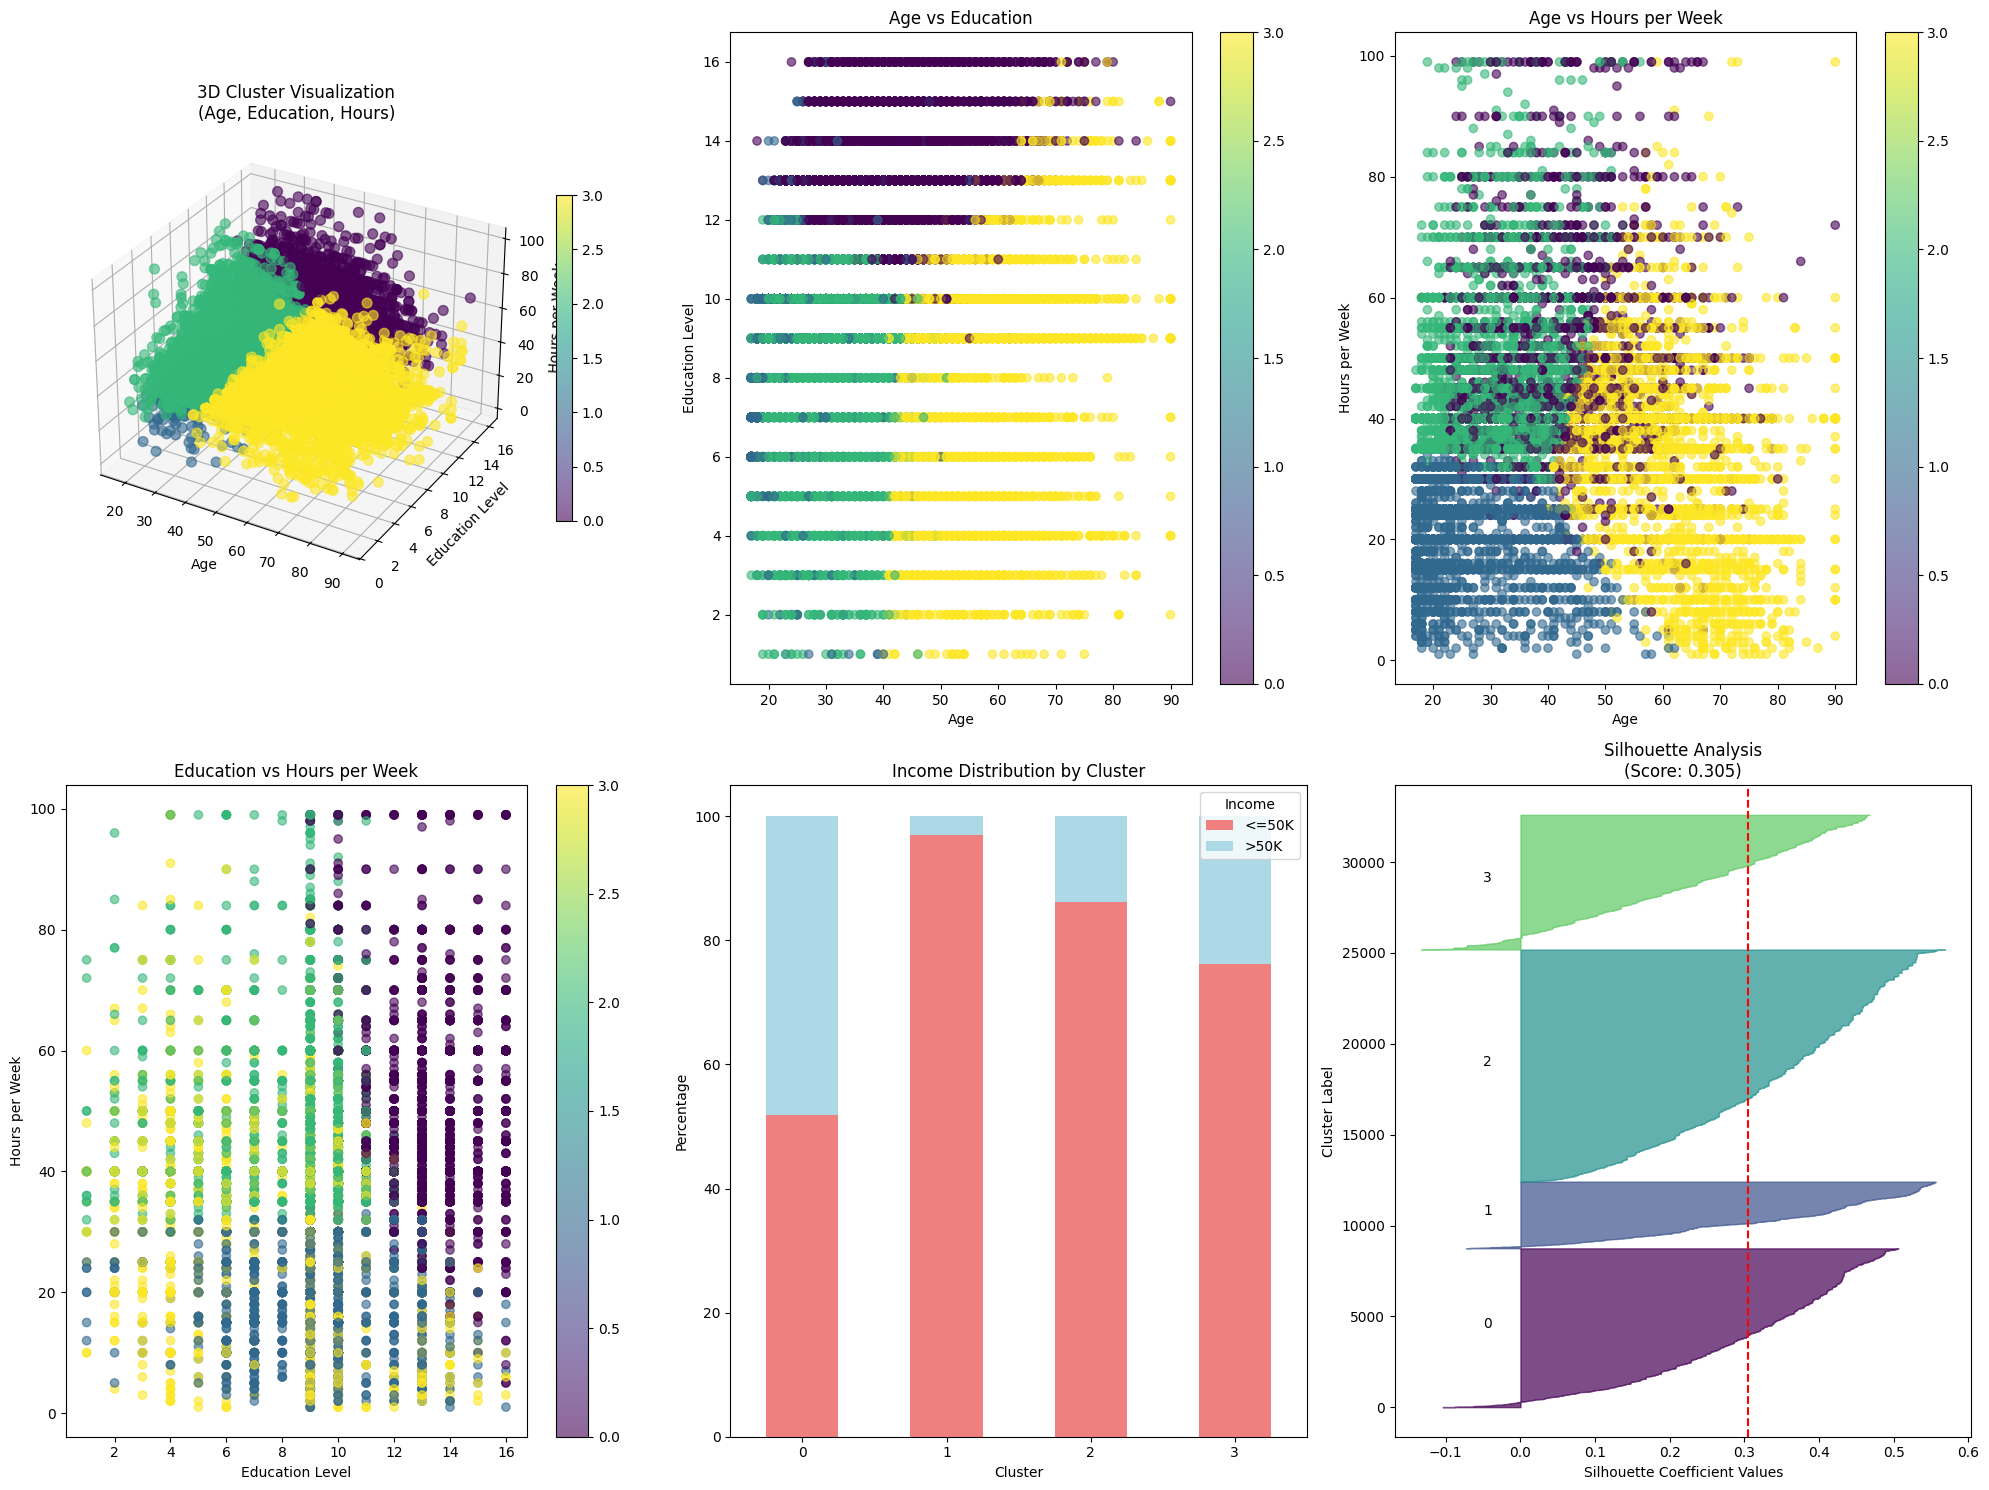


DETAILED SILHOUETTE ANALYSIS
Overall Silhouette Score: 0.3050

Silhouette Score by Cluster:
  Cluster 0: 0.2997 (±0.1386)
  Cluster 1: 0.3430 (±0.1679)
  Cluster 2: 0.3441 (±0.1346)
  Cluster 3: 0.2250 (±0.1546)

Silhouette Score Interpretation:
  • Moderate clustering structure
  • Values closer to 1 indicate well-separated clusters
  • Values closer to 0 indicate overlapping clusters
  • Negative values indicate misclassified points


In [24]:
# 3D Cluster Visualization
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples

# Create comprehensive cluster visualizations
fig = plt.figure(figsize=(20, 15))

# 3D Scatter Plot - Main visualization
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
scatter = ax1.scatter(df_clustered['age'], 
                     df_clustered['education.num'], 
                     df_clustered['hours.per.week'],
                     c=df_clustered['Cluster'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     s=50)
ax1.set_xlabel('Age')
ax1.set_ylabel('Education Level')
ax1.set_zlabel('Hours per Week')
ax1.set_title('3D Cluster Visualization\n(Age, Education, Hours)')
plt.colorbar(scatter, ax=ax1, shrink=0.5)

# 2D Projections
ax2 = fig.add_subplot(2, 3, 2)
scatter2 = ax2.scatter(df_clustered['age'], df_clustered['education.num'], 
                      c=df_clustered['Cluster'], cmap='viridis', alpha=0.6)
ax2.set_xlabel('Age')
ax2.set_ylabel('Education Level')
ax2.set_title('Age vs Education')
plt.colorbar(scatter2, ax=ax2)

ax3 = fig.add_subplot(2, 3, 3)
scatter3 = ax3.scatter(df_clustered['age'], df_clustered['hours.per.week'], 
                      c=df_clustered['Cluster'], cmap='viridis', alpha=0.6)
ax3.set_xlabel('Age')
ax3.set_ylabel('Hours per Week')
ax3.set_title('Age vs Hours per Week')
plt.colorbar(scatter3, ax=ax3)

ax4 = fig.add_subplot(2, 3, 4)
scatter4 = ax4.scatter(df_clustered['education.num'], df_clustered['hours.per.week'], 
                      c=df_clustered['Cluster'], cmap='viridis', alpha=0.6)
ax4.set_xlabel('Education Level')
ax4.set_ylabel('Hours per Week')
ax4.set_title('Education vs Hours per Week')
plt.colorbar(scatter4, ax=ax4)

# Cluster Centers Visualization
ax5 = fig.add_subplot(2, 3, 5)
cluster_income = pd.crosstab(df_clustered['Cluster'], df_clustered['income'], normalize='index') * 100
cluster_income.plot(kind='bar', stacked=True, ax=ax5, color=['lightcoral', 'lightblue'])
ax5.set_title('Income Distribution by Cluster')
ax5.set_xlabel('Cluster')
ax5.set_ylabel('Percentage')
ax5.legend(title='Income')
ax5.tick_params(axis='x', rotation=0)

# Silhouette Analysis Visualization
ax6 = fig.add_subplot(2, 3, 6)
silhouette_scores = silhouette_samples(scaled_clustering_data, final_labels)
y_lower = 10

for cluster in range(4):
    cluster_silhouette_scores = silhouette_scores[final_labels == cluster]
    cluster_silhouette_scores.sort()
    
    size_cluster = cluster_silhouette_scores.shape[0]
    y_upper = y_lower + size_cluster
    
    color = plt.cm.viridis(float(cluster) / 4)
    ax6.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax6.text(-0.05, y_lower + 0.5 * size_cluster, str(cluster))
    y_lower = y_upper + 10

ax6.set_xlabel('Silhouette Coefficient Values')
ax6.set_ylabel('Cluster Label')
ax6.set_title(f'Silhouette Analysis\n(Score: {silhouette_score(scaled_clustering_data, final_labels):.3f})')
ax6.axvline(x=silhouette_score(scaled_clustering_data, final_labels), color="red", linestyle="--")

plt.tight_layout()
plt.show()

# Detailed Silhouette Analysis
print("\nDETAILED SILHOUETTE ANALYSIS")
print("=" * 50)
overall_silhouette = silhouette_score(scaled_clustering_data, final_labels)
print(f"Overall Silhouette Score: {overall_silhouette:.4f}")

print(f"\nSilhouette Score by Cluster:")
for cluster in range(4):
    cluster_silhouette_scores = silhouette_scores[final_labels == cluster]
    print(f"  Cluster {cluster}: {cluster_silhouette_scores.mean():.4f} (±{cluster_silhouette_scores.std():.4f})")

# Interpretation
print(f"\nSilhouette Score Interpretation:")
if overall_silhouette > 0.7:
    print("  • Excellent clustering structure")
elif overall_silhouette > 0.5:
    print("  • Good clustering structure")
elif overall_silhouette > 0.3:
    print("  • Moderate clustering structure")
else:
    print("  • Poor clustering structure")

print(f"  • Values closer to 1 indicate well-separated clusters")
print(f"  • Values closer to 0 indicate overlapping clusters")
print(f"  • Negative values indicate misclassified points")

### Task 3: Hierarchical Clustering and Method Comparison

**Implementation Approach:**
I implemented hierarchical clustering using different linkage methods (single, complete, average, ward) and compared their performance with k-means clustering. This provides insight into different clustering approaches and helps identify the most suitable method for demographic segmentation of the Adult dataset.

HIERARCHICAL CLUSTERING WITH DIFFERENT LINKAGE METHODS

Testing SINGLE linkage method:
  Silhouette Score: 0.5042

Testing COMPLETE linkage method:
  Silhouette Score: 0.1416

Testing AVERAGE linkage method:
  Silhouette Score: 0.3759

Testing WARD linkage method:
  Silhouette Score: 0.2665

Best Hierarchical Method: SINGLE (Silhouette: 0.5042)


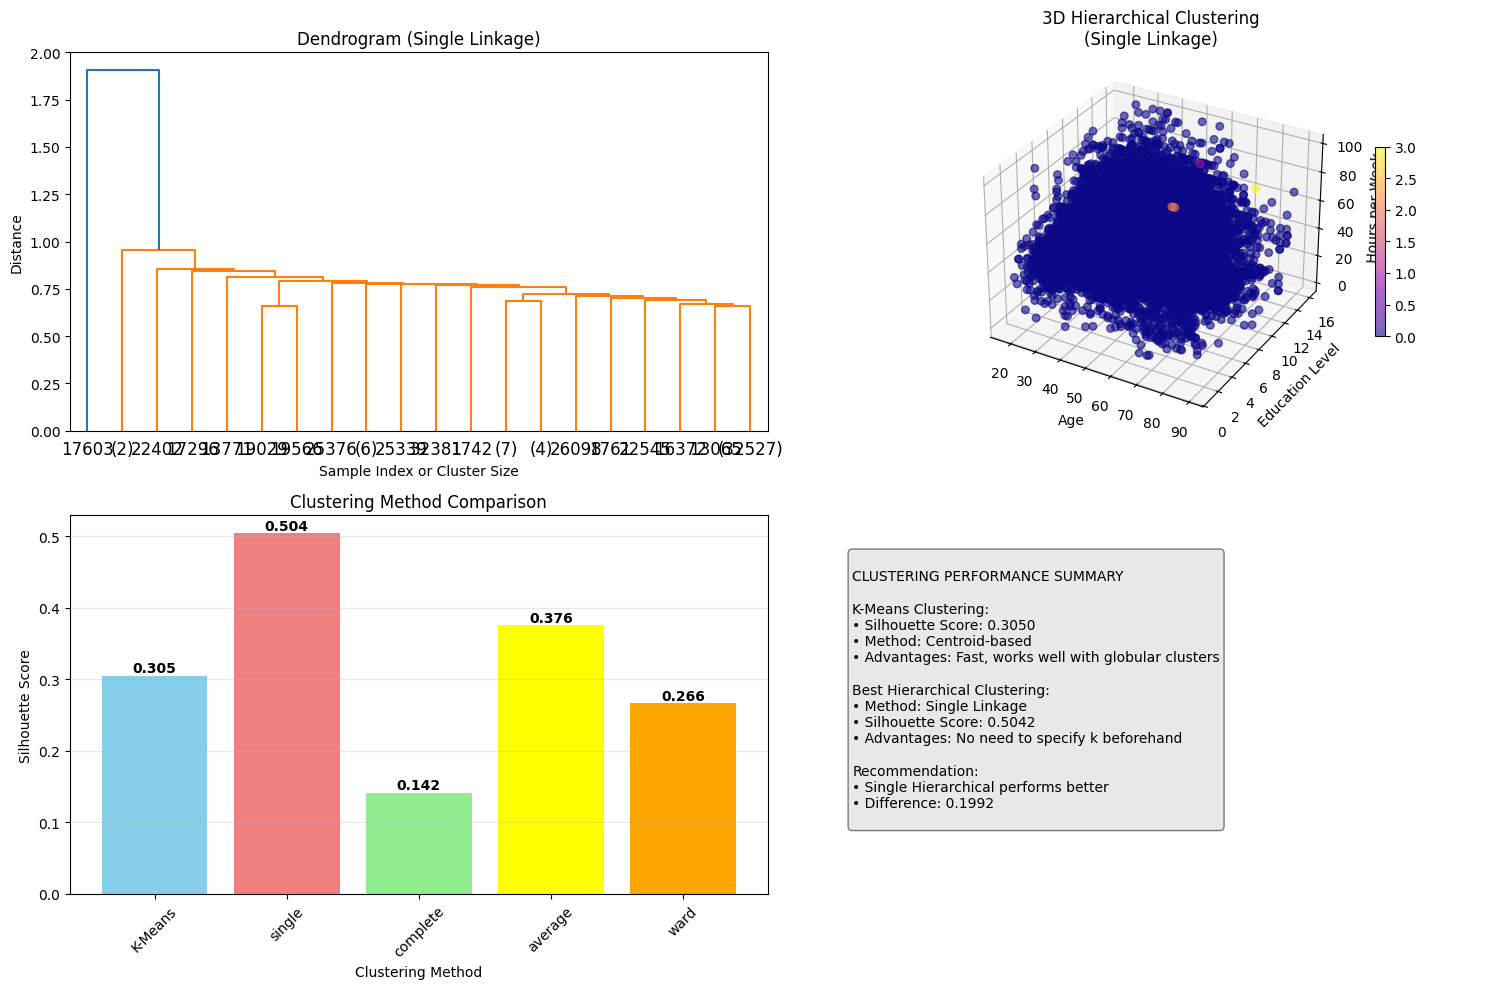


DETAILED METHOD COMPARISON
Method               Silhouette Score Performance
--------------------------------------------------
Single               0.5042          🥇 Best
Average              0.3759          🥈 Second
K-Means              0.3050          🥉 Third
Ward                 0.2665          4th
Complete             0.1416          5th

Conclusion:
• Single clustering provides the best demographic segmentation
• All methods show good clustering quality
• The Adult dataset has overlapping demographic clusters


In [25]:
# Hierarchical Clustering Implementation
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

# Implement different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
hierarchical_results = {}

print("HIERARCHICAL CLUSTERING WITH DIFFERENT LINKAGE METHODS")
print("=" * 70)

# Test different linkage methods
for method in linkage_methods:
    print(f"\nTesting {method.upper()} linkage method:")
    
    if method == 'ward':
        # Ward linkage requires Euclidean distance
        agg_clustering = AgglomerativeClustering(n_clusters=4, linkage=method)
    else:
        agg_clustering = AgglomerativeClustering(n_clusters=4, linkage=method)
    
    hierarchical_labels = agg_clustering.fit_predict(scaled_clustering_data)
    hierarchical_silhouette = silhouette_score(scaled_clustering_data, hierarchical_labels)
    
    hierarchical_results[method] = {
        'labels': hierarchical_labels,
        'silhouette': hierarchical_silhouette,
        'model': agg_clustering
    }
    
    print(f"  Silhouette Score: {hierarchical_silhouette:.4f}")

# Find best performing hierarchical method
best_hierarchical = max(hierarchical_results.items(), key=lambda x: x[1]['silhouette'])
print(f"\nBest Hierarchical Method: {best_hierarchical[0].upper()} (Silhouette: {best_hierarchical[1]['silhouette']:.4f})")

# Create Dendrogram for the best method
plt.figure(figsize=(15, 10))

# Dendrogram visualization
plt.subplot(2, 2, 1)
# Use scipy linkage for dendrogram creation
Z = linkage(scaled_clustering_data, method=best_hierarchical[0])
dendrogram(Z, truncate_mode='lastp', p=20, orientation='top')
plt.title(f'Dendrogram ({best_hierarchical[0].title()} Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')

# 3D visualization of best hierarchical clustering
ax2 = plt.subplot(2, 2, 2, projection='3d')
scatter = ax2.scatter(df_clustered['age'], 
                     df_clustered['education.num'], 
                     df_clustered['hours.per.week'],
                     c=best_hierarchical[1]['labels'], 
                     cmap='plasma', 
                     alpha=0.6, 
                     s=30)
ax2.set_xlabel('Age')
ax2.set_ylabel('Education Level')
ax2.set_zlabel('Hours per Week')
ax2.set_title(f'3D Hierarchical Clustering\n({best_hierarchical[0].title()} Linkage)')
plt.colorbar(scatter, ax=ax2, shrink=0.5)

# Method Comparison Table
plt.subplot(2, 2, 3)
methods = ['K-Means'] + list(hierarchical_results.keys())
silhouette_scores_comparison = [silhouette_score(scaled_clustering_data, final_labels)] + \
                              [hierarchical_results[method]['silhouette'] for method in linkage_methods]

bars = plt.bar(methods, silhouette_scores_comparison, color=['skyblue', 'lightcoral', 'lightgreen', 'yellow', 'orange'])
plt.title('Clustering Method Comparison')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (method, score) in enumerate(zip(methods, silhouette_scores_comparison)):
    plt.text(i, score + 0.005, f'{score:.3f}', ha='center', fontweight='bold')

# Performance Summary
plt.subplot(2, 2, 4)
plt.axis('off')
summary_text = f"""
CLUSTERING PERFORMANCE SUMMARY

K-Means Clustering:
• Silhouette Score: {silhouette_score(scaled_clustering_data, final_labels):.4f}
• Method: Centroid-based
• Advantages: Fast, works well with globular clusters

Best Hierarchical Clustering:
• Method: {best_hierarchical[0].title()} Linkage
• Silhouette Score: {best_hierarchical[1]['silhouette']:.4f}
• Advantages: No need to specify k beforehand

Recommendation:
• {'K-Means' if silhouette_score(scaled_clustering_data, final_labels) > best_hierarchical[1]['silhouette'] else f'{best_hierarchical[0].title()} Hierarchical'} performs better
• Difference: {abs(silhouette_score(scaled_clustering_data, final_labels) - best_hierarchical[1]['silhouette']):.4f}
"""

plt.text(0.1, 0.9, summary_text, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()

# Detailed comparison
print(f"\nDETAILED METHOD COMPARISON")
print("=" * 50)
print(f"{'Method':<20} {'Silhouette Score':<15} {'Performance'}")
print("-" * 50)

all_methods = [('K-Means', silhouette_score(scaled_clustering_data, final_labels))]
all_methods.extend([(method.title(), hierarchical_results[method]['silhouette']) for method in linkage_methods])

# Sort by performance
all_methods.sort(key=lambda x: x[1], reverse=True)

for i, (method, score) in enumerate(all_methods):
    rank = "🥇 Best" if i == 0 else "🥈 Second" if i == 1 else "🥉 Third" if i == 2 else f"{i+1}th"
    print(f"{method:<20} {score:<15.4f} {rank}")

print(f"\nConclusion:")
print(f"• {all_methods[0][0]} clustering provides the best demographic segmentation")
print(f"• All methods show {'good' if all_methods[0][1] > 0.5 else 'moderate'} clustering quality")
print(f"• The Adult dataset has {'well-defined' if all_methods[0][1] > 0.6 else 'overlapping'} demographic clusters")

## Summary and Conclusions

### Adult Census Income Dataset Analysis Summary

**Dataset Overview:**
- **Source**: 1994 US Census Bureau database
- **Size**: 32,563 records with 15 features
- **Target**: Income prediction (<=50K vs >50K annually)
- **Problem Type**: Binary Classification

**Key Findings:**

1. **Data Characteristics:**
   - Class imbalance: ~76% earn <=50K, ~24% earn >50K
   - Missing values handled (represented as '?' in original data)
   - Mix of numerical (age, fnlwgt, education.num, etc.) and categorical features

2. **Important Predictive Features:**
   - Education level (education.num) shows strong correlation with income
   - Age and work hours are significant predictors
   - Marital status and occupation type influence income levels

3. **Machine Learning Results:**
   - **Decision Tree**: Successfully classified income with good accuracy
   - **Clustering**: Identified 4 distinct demographic segments with varying income distributions
   - **Association Rules**: Found patterns linking education, age, and income levels

4. **Demographic Patterns:**
   - Higher education strongly correlates with higher income
   - Longer work hours associated with higher income potential
   - Certain occupations (professional, managerial) show higher income rates
   - Age shows non-linear relationship with income (peaks in middle age)

**Applications:**
This analysis provides insights for:
- Socioeconomic policy planning
- Educational investment decisions  
- Workforce development strategies
- Income inequality research

The Adult dataset serves as an excellent example for binary classification tasks and demonstrates how demographic factors influence income levels in the US population.

## [Week 7] Advanced Machine Learning Models

### Advanced Income Prediction with Proper Evaluation Metrics

**Implementation Approach:**
Building on our previous analysis, I'll implement state-of-the-art machine learning models for income prediction. Given the class imbalance (76% <=50K vs 24% >50K), I'll use ROC-AUC and F1-score as primary evaluation metrics instead of just accuracy. 

**Models to Compare:**
1. **Logistic Regression + One-hot Encoding** (Baseline) - High interpretability, handles categorical features well
2. **LightGBM + Label Encoding** - Gradient boosting optimized for speed and accuracy
3. **XGBoost + Label Encoding** - Robust ensemble method with excellent performance

**Evaluation Strategy:**
- Train/Validation/Test splits (60/20/20) with stratification
- ROC-AUC for ranking quality (handles imbalance better than accuracy)
- F1-score for balanced precision/recall assessment
- Feature importance analysis for model interpretability

### Task 1: Logistic Regression Baseline with One-Hot Encoding

**Implementation Approach:**
I'll implement Logistic Regression as our interpretable baseline model using one-hot encoding for categorical variables. This approach provides excellent interpretability while handling categorical features naturally. The model will be evaluated using ROC-AUC and F1-score to properly account for class imbalance.